# Perfil comercial de um país

Perfil comercial de um país. O objetivo é analisar as trocas comerciais de um país com o resto do mundo.

Mais informação em [country_trade_profile_README.md](country_trade_profile_README.md)

## Setup

For instructions and how to obtain an API key, see [here](0-comtrade-setup-first.ipynb).

In [314]:
import logging
import sys

# Configure logging to output to stdout and set level to DEBUG
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

# Example info message
logging.info("This is an info message")
# Example debug message
logging.debug("This is a debug message")

INFO:root:This is an info message


In [315]:
import comtradetools as comtradetools

comtradetools.setup()
APIKEY = comtradetools.get_api_key()
comtradetools.init(APIKEY, force_init=False)


In [316]:
import pandas as pd

pd.options.display.float_format = '{:,.2f}'.format

## Country and period of interest

Choose country and years of interest

In [317]:
import comtradetools


country_of_interest_name = 'Timor-Leste'
country_of_interest = comtradetools.encode_country(country_of_interest_name)

years_of_interest=comtradetools.year_range(2003,2023)
print(country_of_interest_name, country_of_interest, years_of_interest)

Timor-Leste 626 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


In [318]:
from datetime import datetime

current_datetime = datetime.now()
print(f"Start run for {country_of_interest_name}:", current_datetime)

Start run for Timor-Leste: 2024-06-19 18:41:45.234896


## 1.Trade balance

### 1a Trade balance symmetric values

In [319]:
import comtradetools
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format

global_trade = comtradetools.get_trade_flows(country_of_interest,
                                        period=years_of_interest,
                                        period_size=1,  # how may years fetched in one call
                                        retry_if_empty=False,
                                        symmetric_values=True)

cols_of_interest = global_trade.columns



INFO:root:Calling getFinalData for period 2003
INFO:root:Using cached results for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Using cached results for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Using cached results for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Using cached results for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Using cached results for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Using cached results for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Using cached results for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Using cached results for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Using cached results for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Using cached results for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Usi

In [320]:
global_trade['varM_perc']=global_trade['M']/global_trade['M<X']
global_trade['varX_perc']=global_trade['X']/global_trade['X<M']
print(f"M = Imports as reported by {country_of_interest_name}")
print(f"X = Exports as reported by {country_of_interest_name}")
print(f"X<M = Exports as reported by rest of the world imports from {country_of_interest_name}")
print(f"M<X = Imports as reported by rest of the world exports to {country_of_interest_name}")
global_trade


M = Imports as reported by Timor-Leste
X = Exports as reported by Timor-Leste
X<M = Exports as reported by rest of the world imports from Timor-Leste
M<X = Imports as reported by rest of the world exports to Timor-Leste


flowCode,M,M<X,X,X<M,trade_balance (X-M),trade_balance (X<M-M),trade_volume (X+M),trade_volume (X<M+M),varM_perc,varX_perc
period,,,,,,,,,,
2003,0.00,"136,164,075.00",0.00,"9,601,952.00",0.00,"9,601,952.00",0.00,"9,601,952.00",0.00,0.00
2004,"113,488,860.00","88,006,488.11","105,654,155.00","52,755,793.93","-7,834,705.00","-60,733,066.07","219,143,015.00","166,244,653.93",1.29,2.00
2005,"101,613,157.00","91,328,995.43","43,450,997.00","74,371,950.12","-58,162,160.00","-27,241,206.88","145,064,154.00","175,985,107.12",1.11,0.58
2006,0.00,"109,997,286.01",0.00,"37,225,866.92",0.00,"37,225,866.92",0.00,"37,225,866.92",0.00,0.00
2007,0.00,"112,639,799.50",0.00,"30,873,286.95",0.00,"30,873,286.95",0.00,"30,873,286.95",0.00,0.00
2008,0.00,"336,130,526.75",0.00,"169,518,426.10",0.00,"169,518,426.10",0.00,"169,518,426.10",0.00,0.00
2009,0.00,"365,062,508.18",0.00,"105,415,525.52",0.00,"105,415,525.52",0.00,"105,415,525.52",0.00,0.00
2010,0.00,"908,148,207.36",0.00,"71,916,333.30",0.00,"71,916,333.30",0.00,"71,916,333.30",0.00,0.00
2011,0.00,"604,720,420.21",0.00,"153,956,968.71",0.00,"153,956,968.71",0.00,"153,956,968.71",0.00,0.00


Save to Excel file

In [321]:
start_year=global_trade.index.min()
end_year=global_trade.index.max()
excel_file = f"reports/{country_of_interest_name}_1.1_trade_balance_{start_year}-{end_year}.xlsx"
global_trade.to_excel(excel_file)
print("Trade ballance report saved to ", excel_file)

Trade ballance report saved to  reports/Timor-Leste_1.1_trade_balance_2003-2023.xlsx


### Trade balance graph

Plot saved to  reports/Timor-Leste_1.2_trade_balance_2003-2023.png
0 Line2D(M) 0.0
1 Line2D(M<X) 0.8
2 Line2D(X) 0.0
3 Line2D(X<M) 0.8
4 Line2D(trade_balance (X-M)) 0.0
5 Line2D(trade_balance (X<M-M)) 0.8
6 Line2D(trade_volume (X+M)) 0.0
7 Line2D(trade_volume (X<M+M)) 0.8


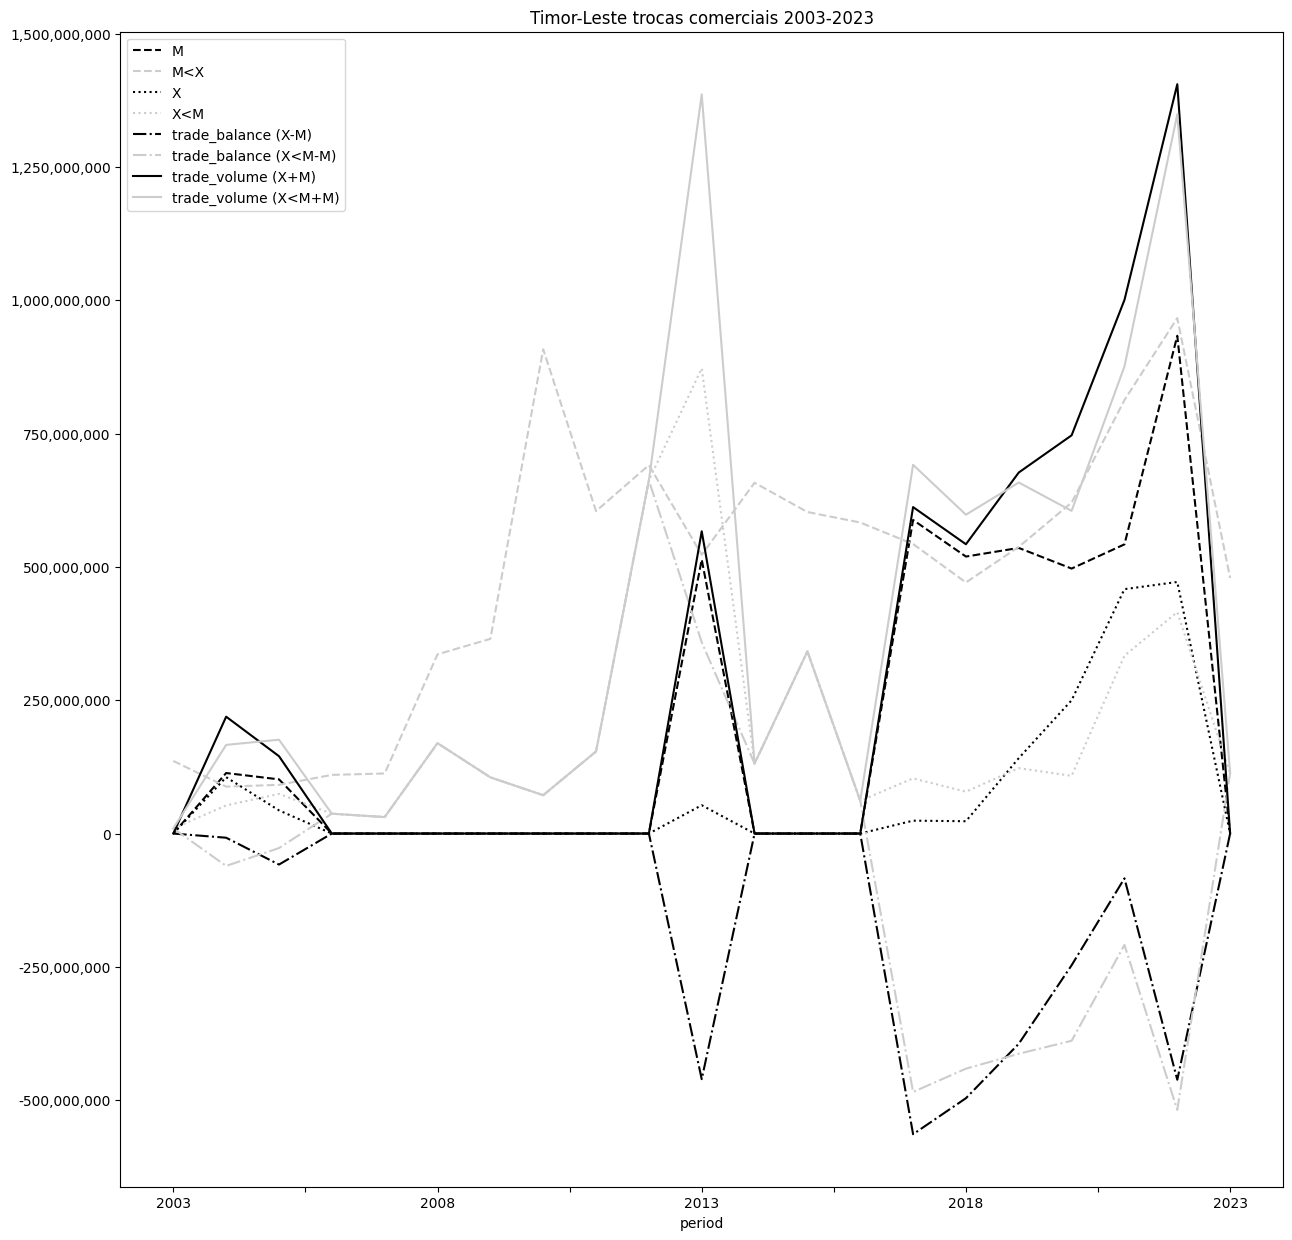

In [322]:
import logging

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
logging.basicConfig(level=logging.ERROR)

plotfile = f"reports/{country_of_interest_name}_1.2_trade_balance_{start_year}-{end_year}.png"

start_year=global_trade.index.min()
end_year=global_trade.index.max()
title=f"{country_of_interest_name} trocas comerciais {start_year}-{end_year}"
print("Plot saved to ", plotfile)
fig = global_trade[cols_of_interest].plot.line(figsize=(15,15),title=title)

# use a grayscale palette of colors
colors = ['0.0','0.8','0.0','0.8','0.0','0.8','0.0','0.8']

# use different line styles and black lines
linestyles = ['dashed', 'dashed', 'dotted', 'dotted', 'dashdot', 'dashdot', 'solid', 'solid']
for i, line in enumerate(fig.get_lines()):
    print(i, line, colors[i])
    line.set_color(colors[i])
    line.set_linestyle(linestyles[i % len(linestyles)])

formatter = ticker.StrMethodFormatter('{x:,.0f}')
fig.yaxis.set_major_formatter(formatter)
fig.legend(list(global_trade.columns.astype(str)))

plt.savefig(plotfile)
plt.show()

## 2. Exports


### 2.1 Main export partners/clients

Colect destinations of exports of the country. 

Use either reported exports
of country of interest, or reported imports from country of interest by
all other countries (symmetric reporting). 

Set variable `symmetric_reporting` to choose.

In [323]:
# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = False  # set to false to use reported exports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'M'
    reporter_column = 'partner'
    partner_column = 'reporter'
    filename_symmetric_flag="reverse"
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'X'
    reporter_column = 'reporter'
    partner_column = 'partner'
    filename_symmetric_flag="direct"

In [324]:

df = comtradetools.getFinalData(APIKEY,
                                reporterCode=reporterCode,
                                typeCode='C',  # commodities
                                freqCode='A',  # annual
                                flowCode=flowCode,
                                period=years_of_interest,
                                period_size=1,
                                partnerCode=partnerCode,
                                remove_world=True,
                                partner2Code=0,  # world
                                clCode="HS",
                                cmdCode="TOTAL",
                                motCode=0,  # all means of transport
                                customsCode='C00', # all customs
                                includeDesc=True,
                                retry_if_empty=False,
                                cache=True
                                )

INFO:root:Calling getFinalData for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Calling getFinalData for period 2014
INFO:root:Calling getFinalData for period 2015
INFO:root:Calling getFinalData for period 2016
INFO:root:Calling getFinalData for period 2017
INFO:root:Calling getFinalData for period 2018
INFO:root:Calling getFinalData for period 2019
INFO:root:Calling getFinalData for period 2020
INFO:root:Calling getFinalData for period 2021


Compute percentage of trade and rank of partners for each year.

Use `show_only_top` to show only the top partners (e.g. 5).

In [ ]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5

# aggregate by year, flow, reporter
exports = comtradetools.total_rank_perc(df,groupby=['refYear','flowCode',f'{partner_column}Desc'],
                                    col='primaryValue',
                                    prefix='partner',
                                    drop_duplicates=True)

cols=['refYear','flowCode',f'{reporter_column}Desc','partner_rank',f'{partner_column}Desc','cmdCode','partner_sum','partner_perc','partner_upper_sum']

formats =  comtradetools.make_format(cols)

top_export_partners = exports[exports['partner_rank']<=show_only_top][f'{partner_column}Desc'].unique()
top_export_partners_codes = exports[exports['partner_rank']<=show_only_top][f'{partner_column}Code'].unique()

print(f"Top {show_only_top} export partners of {country_of_interest_name} in {years_of_interest}: \n{top_export_partners}")
exports[exports['partner_rank']<=show_only_top][cols].sort_values(['refYear','flowCode','partner_rank',f'{partner_column}Desc','cmdCode']).style.format(formats)

Top 5 export partners of Timor-Leste in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023: 
['Germany' 'Indonesia' 'Nigeria' 'Portugal' 'USA' 'Australia'
 'Rep. of Korea' 'Pakistan' 'Philippines' 'Fiji' 'New Zealand' 'Senegal'
 'China' 'Japan' 'Canada' 'Viet Nam' 'India' 'Singapore' 'Bangladesh'
 'Iran' 'Thailand' 'Sweden' 'Malaysia']


,refYear,flowCode,partnerDesc,partner_rank,reporterDesc,cmdCode,partner_sum,partner_perc,partner_upper_sum
33,2003,M,Timor-Leste,1,USA,TOTAL,"$3,690,085",38.431%,"$9,601,952"
10,2003,M,Timor-Leste,2,Indonesia,TOTAL,"$1,404,018",14.622%,"$9,601,952"
20,2003,M,Timor-Leste,3,Nigeria,TOTAL,"$788,397",8.211%,"$9,601,952"
8,2003,M,Timor-Leste,4,Germany,TOTAL,"$682,000",7.103%,"$9,601,952"
24,2003,M,Timor-Leste,5,Portugal,TOTAL,"$609,154",6.344%,"$9,601,952"
58,2004,M,Timor-Leste,1,Rep. of Korea,TOTAL,"$36,338,268",68.880%,"$52,755,794"
35,2004,M,Timor-Leste,2,Australia,TOTAL,"$6,884,544",13.050%,"$52,755,794"
68,2004,M,Timor-Leste,3,Philippines,TOTAL,"$3,639,769",6.899%,"$52,755,794"
70,2004,M,Timor-Leste,4,Portugal,TOTAL,"$962,050",1.824%,"$52,755,794"
66,2004,M,Timor-Leste,5,Pakistan,TOTAL,"$866,631",1.643%,"$52,755,794"


Pivot the countries to columns, keeping the total value and percentage in separate columns.

----

Passamos os países para colunas, mantendo a percentagem e o valor em separado.

In [ ]:
pivoted = df.pivot_table(index=['refYear','flowDesc'], columns=f'{partner_column}Desc', values=['primaryValue','partner_perc'])
pivoted.swaplevel(axis=1).fillna(0,inplace=True)
pivoted.sort_index(axis=1, level=0, inplace=True)


Limit table to top_export_partners

Note that the number of top partners considered was set before with `show_only_top` (e.g. 5).

But each year the top partners may vary, so that the total number of partners for the period will be
more than `show_only_top`.

In [ ]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_export_partners]
pivoted[show_only_columns].fillna(0)

partner_perc                                             \
reporterDesc        Australia Bangladesh Canada China Fiji Germany India   
refYear flowDesc                                                           
2003    Import           0.06       0.00   0.00  0.00 0.00    0.07  0.00   
2004    Import           0.13       0.00   0.01  0.00 0.00    0.01  0.00   
2005    Import           0.01       0.00   0.01  0.00 0.02    0.00  0.00   
2006    Import           0.01       0.00   0.02  0.29 0.00    0.11  0.02   
2007    Import           0.05       0.00   0.04  0.00 0.00    0.07  0.00   
2008    Import           0.06       0.00   0.04  0.00 0.00    0.02  0.00   
2009    Import           0.04       0.00   0.03  0.00 0.00    0.03  0.00   
2010    Import           0.01       0.00   0.03  0.00 0.00    0.10  0.01   
2011    Import           0.01       0.00   0.00  0.01 0.00    0.12  0.14   
2012    Import           0.00       0.01   0.00  0.00 0.00    0.01  0.00   
2013    Import           0.00       0.00   0.00  0.00 0.00    0.01  0.00   
2014    Import           0.02       0.00   0.02  0.00 0.00    0.07  0.00   
2015    Import           0.00       0.00   0.01  0.00 0.00    0.00  0.00   
2016    Import           0.02       0.00   0.04  0.00 0.00    0.04  0.00   
2017    Import           0.02       0.00   0.03  0.02 0.00    0.03  0.00   
2018    Import           0.01       0.00   0.05  0.04 0.00    0.02  0.00   
2019    Import           0.01       0.00   0.04  0.20 0.00    0.00  0.00   
2020    Import           0.01       0.00   0.04  0.01 0.00    0.00  0.00   
2021    Import           0.00       0.00   0.02  0.34 0.00    0.00  0.00   
2022    Import           0.01       0.00   0.03  0.35 0.00    0.01  0.00   
2023    Import           0.02       0.00   0.02  0.66 0.00    0.01  0.00   

                                       ... primaryValue               \
reporterDesc     Indonesia Iran Japan  ...     Pakistan  Philippines   
refYear flowDesc                       ...                             
2003    Import        0.15 0.00  0.01  ...   390,052.00         0.00   
2004    Import        0.01 0.00  0.00  ...   866,631.00 3,639,769.00   
2005    Import        0.01 0.00  0.01  ...   386,057.00         0.00   
2006    Import        0.06 0.00  0.37  ...   320,713.00         0.00   
2007    Import        0.01 0.00  0.70  ...    17,933.00       252.00   
2008    Import        0.02 0.00  0.82  ...   200,558.00         0.00   
2009    Import        0.01 0.00  0.48  ...         0.00    27,537.00   
2010    Import        0.01 0.00  0.61  ...         0.00       288.00   
2011    Import        0.01 0.00  0.09  ...         0.00         0.00   
2012    Import        0.00 0.00  0.14  ...         0.00    36,794.00   
2013    Import        0.00 0.35  0.01  ...     2,574.00       382.00   
2014    Import        0.00 0.00  0.14  ...         0.00       205.00   
2015    Import        0.00 0.00  0.02  ...     1,825.00    43,448.00   
2016    Import        0.02 0.00  0.02  ...         0.00     7,338.00   
2017    Import        0.02 0.00  0.01  ...       350.48     6,609.00   
2018    Import        0.05 0.00  0.01  ...       321.44     7,811.00   
2019    Import        0.05 0.00  0.09  ...     5,146.15     8,199.00   
2020    Import        0.02 0.00  0.17  ...         0.00       137.00   
2021    Import        0.01 0.00  0.20  ...         0.00    28,069.00   
2022    Import        0.01 0.00  0.17  ...         0.00     1,704.00   
2023    Import        0.00 0.00  0.21  ...         0.00     2,075.00   

                                                                          \
reporterDesc         Portugal  Rep. of Korea      Senegal      Singapore   
refYear flowDesc                                                           
2003    Import     609,154.00         415.00    41,790.00           0.00   
2004    Import     962,050.00  36,338,268.00    61,344.00           0.00   
2005    Import   1,450,635.00  26,042,038.00 1,032,748.00           0.00   
2006   

Make a table with the total value of exports for top partners in the period of interest

In [ ]:
print("Top partners for exports: ",top_export_partners)
print("Period of interest:",years_of_interest)

Top partners for exports:  ['Germany' 'Indonesia' 'Nigeria' 'Portugal' 'USA' 'Australia'
 'Rep. of Korea' 'Pakistan' 'Philippines' 'Fiji' 'New Zealand' 'Senegal'
 'China' 'Japan' 'Canada' 'Viet Nam' 'India' 'Singapore' 'Bangladesh'
 'Iran' 'Thailand' 'Sweden' 'Malaysia']
Period of interest: 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


In [ ]:
import pandas as pd

# lets get just the value of imports from the top export partners
values_only = pivoted.loc[:,"primaryValue"]
values_only.reset_index(level=1, drop=True, inplace=True)
show_only_columns = [country for country in values_only.columns.tolist() if country in top_export_partners]
values_only=values_only[show_only_columns]
# sort columns by mean value
mean_values = values_only.mean().sort_values(ascending=False)
values_only = values_only[mean_values.index]
values_only

reporterDesc,Iran,Singapore,Rep. of Korea,Japan,China,Thailand,Germany,Canada,USA,Malaysia,...,India,Nigeria,Bangladesh,Portugal,Sweden,Viet Nam,Senegal,Philippines,Pakistan,Fiji
refYear,,,,,,,,,,,,,,,,,,,,,
2003,NaN,NaN,415.00,"75,350.00",62.00,"9,640.00","682,000.00",NaN,"3,690,085.00","143,948.00",...,"23,829.00","788,397.00",NaN,"609,154.00",NaN,"214,732.00","41,790.00",NaN,"390,052.00","10,570.00"
2004,NaN,NaN,"36,338,268.00","239,631.00",89.00,"12,862.00","609,000.00","306,716.00","28,364.00","8,011.00",...,"11,079.00",NaN,138.00,"962,050.00","7,366.00","19,800.00","61,344.00","3,639,769.00","866,631.00","15,783.00"
2005,NaN,NaN,"26,042,038.00","568,845.00",716.00,"1,541.00","35,000.00","659,845.00","85,373.00","17,217.00",...,"23,664.00",NaN,NaN,"1,450,635.00",NaN,"192,336.00","1,032,748.00",NaN,"386,057.00","1,194,492.00"
2006,NaN,NaN,"15,010.00","13,765,383.00","10,964,132.00","118,144.00","4,060,000.00","930,216.00","12,140.00","13,283.00",...,"612,158.00","23,194.00",NaN,"1,564,543.00",NaN,"100,509.00","657,161.00",NaN,"320,713.00","6,958.00"
2007,NaN,NaN,"78,218.00","21,642,990.00","49,480.00","538,097.00","2,161,000.00","1,250,913.00","324,643.00","196,398.00",...,"36,804.00",NaN,449.00,"218,288.00",NaN,"80,716.00","820,762.00",252.00,"17,933.00","2,144.00"
2008,NaN,NaN,"27,651.00","139,158,144.00","106,162.00","5,924.00","3,893,040.53","6,526,337.00","24,198.00","156,473.00",...,"66,231.00","357,416.00","2,248.00","765,278.00","48,494.00","2,328,110.00","1,457,089.00",NaN,"200,558.00",135.00
2009,NaN,NaN,"34,413,818.00","50,372,990.00","22,765.00","52,649.00","2,899,529.68","3,587,190.00","69,071.00","132,527.00",...,"171,720.00","22,838.00",NaN,"1,272,903.00","7,113.00","3,736,657.00","602,432.00","27,537.00",NaN,NaN
2010,NaN,NaN,"168,221.00","43,841,383.00","250,487.00","15,636.00","7,525,217.83","1,988,664.00",NaN,"255,640.00",...,"919,355.00","10,293,101.00",NaN,"1,482,332.00","1,670.00",NaN,"501,036.02",288.00,NaN,"1,231.00"
2011,NaN,"48,631,994.87","39,709,847.00","13,868,715.00","1,742,791.00","47,664.00","19,223,542.04","393,230.00","27,152.00","205,580.00",...,"22,237,731.00","1,177.00",NaN,"1,429,208.00",NaN,NaN,"107,772.00",NaN,NaN,"17,100.00"


Plot saved to  reports/Timor-Leste_2.1.4_export_2003-2023_reverse.png
0 Line2D(_child0) #555555
1 Line2D(_child2) #666666
2 Line2D(_child4) #777777
3 Line2D(_child6) #888888
4 Line2D(_child8) #999999
5 Line2D(_child10) #AAAAAA
6 Line2D(_child12) #BBBBBB
7 Line2D(_child14) #CCCCCC
8 Line2D(_child16) #555555
9 Line2D(_child18) #666666
10 Line2D(_child20) #777777
11 Line2D(_child22) #888888
12 Line2D(_child24) #999999
13 Line2D(_child26) #AAAAAA
14 Line2D(_child28) #BBBBBB
15 Line2D(_child30) #CCCCCC
16 Line2D(_child32) #555555
17 Line2D(_child34) #666666
18 Line2D(_child36) #777777
19 Line2D(_child38) #888888
20 Line2D(_child40) #999999
21 Line2D(_child42) #AAAAAA
22 Line2D(_child44) #BBBBBB


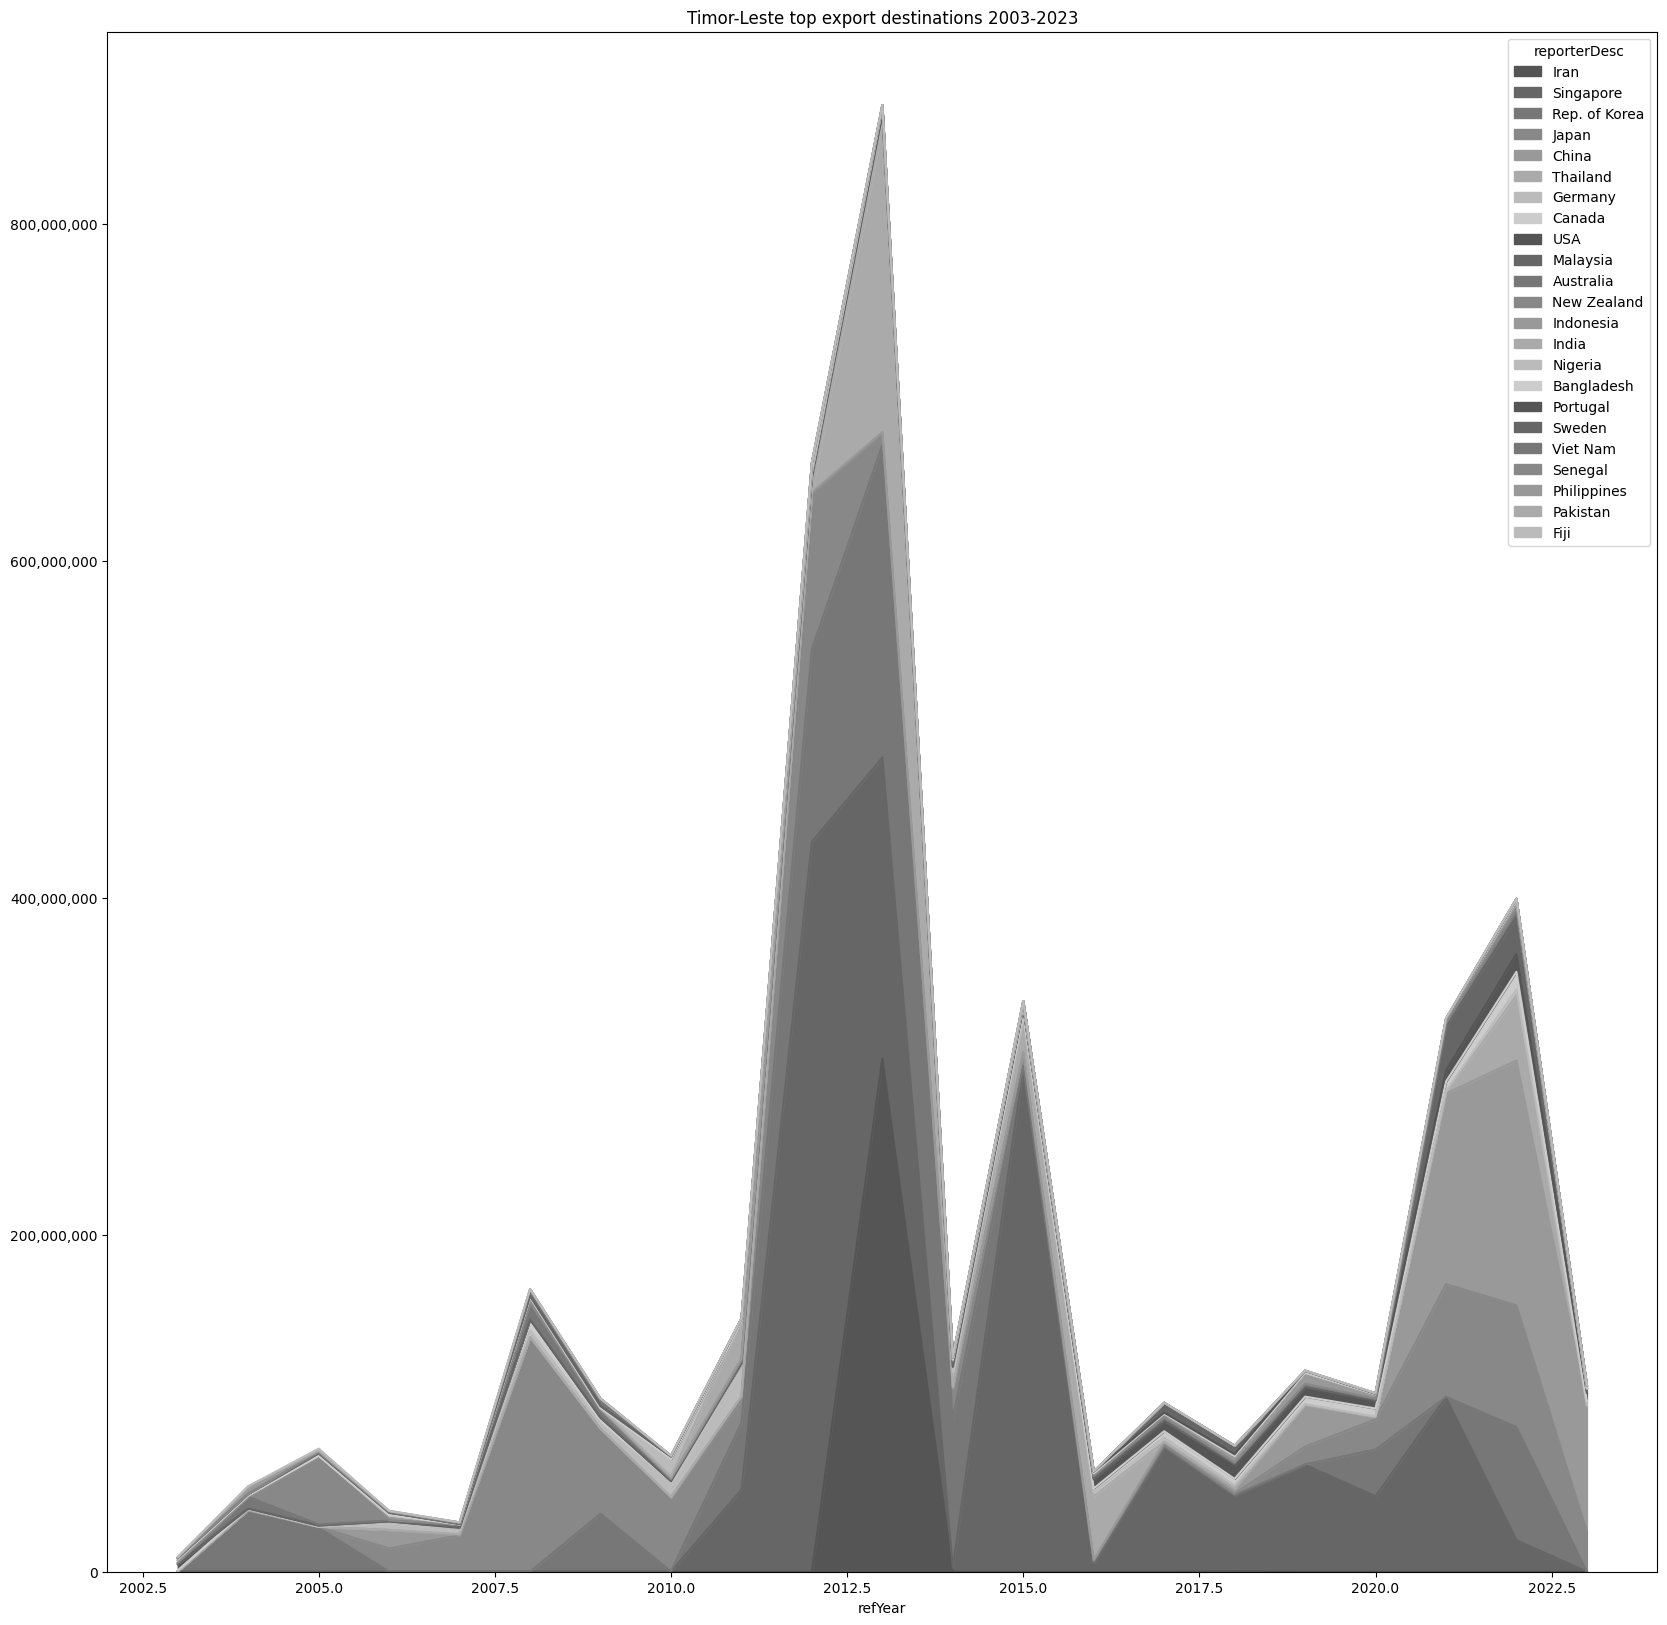

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plotfile = f"reports/{country_of_interest_name}_2.1.4_export_{start_year}-{end_year}_{filename_symmetric_flag}.png"
start_year=values_only.index.min()
end_year=values_only.index.max()
title=f"{country_of_interest_name} top export destinations {start_year}-{end_year}"
print("Plot saved to ", plotfile)
# see https://matplotlib.org/stable/gallery/color/named_colors.html
# colors = ['red','lightsalmon','green','lightgreen','darkviolet','violet','blue','dodgerblue','orange','yellow','brown','black','grey','pink','cyan','magenta',]
# colors = ['crimson', 'darkorange', 'gold', 'limegreen', 'mediumseagreen', 'teal', 'deepskyblue', 'royalblue', 'indigo', 'mediumvioletred', 'hotpink', 'saddlebrown', 'grey', 'black', 'darkslategrey', 'darkkhaki']
colors = [ '#555555', '#666666', '#777777', '#888888', '#999999', '#AAAAAA', '#BBBBBB', '#CCCCCC', ]

fig2 = values_only.plot.area(figsize=(20,20),title=title, color=colors)
for i, line in enumerate(fig2.get_lines()):
    n = i % len(colors)
    print(i, line, colors[n])
    line.set_color(colors[n])

formatter = ticker.StrMethodFormatter('{x:,.0f}')
fig2.yaxis.set_major_formatter(formatter)

plt.savefig(plotfile)
plt.show()

#### Export to Excel

Table with the top export destinations for the period of interest

In [ ]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_export_partners]

top_partners_file = f'reports/{country_of_interest_name}_2.1.1_top_export_partners_{filename_symmetric_flag}.xlsx'
top_partners_cols_file = f'reports/{country_of_interest_name}_2.1.2_top_export_partners_cols_{filename_symmetric_flag}.xlsx'
export_top_partners_file = f'reports/{country_of_interest_name}_2.1.3_export_top_{show_only_top}_partners_{start_year}-{end_year}_{filename_symmetric_flag}.xlsx'

exports[cols].sort_values(['refYear','flowCode','partner_rank',f'{partner_column}Desc','cmdCode']).to_excel(top_partners_file)
pivoted.to_excel(top_partners_cols_file)
pivoted[show_only_columns].to_excel(export_top_partners_file)

print(f"Top partners file: {top_partners_file}")
print(f"Top partners cols file: {top_partners_cols_file}")
print(f"Export top partners file: {export_top_partners_file}")

Top partners file: reports/Timor-Leste_2.1.1_top_export_partners_reverse.xlsx
Top partners cols file: reports/Timor-Leste_2.1.2_top_export_partners_cols_reverse.xlsx
Export top partners file: reports/Timor-Leste_2.1.3_export_top_5_partners_2003-2023_reverse.xlsx


### 2.2 Exports: products

#### What are the main exported products

In [ ]:
import pandas as pd

# show 500 lines of dataframes
pd.set_option('display.max_rows', 500)

show_only_top=5

print(country_of_interest_name, years_of_interest)

Timor-Leste 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


Get the products exported by country of interest

In [ ]:

# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = symmetric_reporting  # use mode from previous cells

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'M'
    reporter_column = 'partner'
    partner_column = 'reporter'
    filename_symmetric_flag="reverse"
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'X'
    reporter_column = 'reporter'
    partner_column = 'partner'
    filename_symmetric_flag="direct"

filename_symmetric_flag

'reverse'

In [ ]:
import comtradetools

clCode = 'HS'
cmdDetail = 'AG6'  # AG2 aggregate two digits, top level, AG4 detail 4 digits, ... World Bank uses AG6
df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1,
                        partnerCode=partnerCode,
                        remove_world=False,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        retry_if_empty=False,
                        cache=True

                        )

INFO:root:Calling getFinalData for period 2003
INFO:root:Using cached results for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Using cached results for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Using cached results for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Using cached results for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Using cached results for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Using cached results for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Calling getFinalData for period 2014
INFO:root:Calling getFinalData for period 2015
INFO:root:Calling getFinalData for period 2016
INFO:root:Calling getFinalData for period 2017
INFO:root:Cal

In [ ]:
print("Years available in the data:", list(df.refYear.unique()))

Years available in the data: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x173523d00>


In [ ]:
df.head()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,A,20030101,2003,52,2003,360,IDN,Indonesia,M,...,"1,117,440.00",False,NaN,False,"851,582.00",NaN,"851,582.00",0,False,False
1,C,A,20030101,2003,52,2003,360,IDN,Indonesia,M,...,"25,977.00",False,NaN,False,"3,643.00",NaN,"3,643.00",0,False,False
2,C,A,20030101,2003,52,2003,360,IDN,Indonesia,M,...,"23,074.00",False,NaN,False,"4,074.00",NaN,"4,074.00",0,False,False
3,C,A,20030101,2003,52,2003,360,IDN,Indonesia,M,...,25.00,False,NaN,False,141.00,NaN,141.00,0,False,False
4,C,A,20030101,2003,52,2003,704,VNM,Viet Nam,M,...,"1,462.00",True,NaN,False,"2,580.00",NaN,"2,580.00",6,False,False


Agreggate by product, keep the top products exported each year

In [ ]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
exports = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode'],'primaryValue','product',drop_duplicates=True)
exports = exports[exports['product_rank']<=show_only_top]
exports.info()

cols=['refYear','flowCode','product_rank','cmdCode', 'cmdDesc','product_sum','product_upper_perc', 'product_upper_sum']
formats =  comtradetools.make_format(cols)

top_export_products_codes = exports['cmdCode'].unique()

print(f"Top products exported by {country_of_interest_name} in {years_of_interest}:\n {top_export_products_codes}")
for cmdCode in top_export_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")
exports[cols].sort_values(['refYear','flowCode','product_rank']).head(10).style.format(formats)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 9178
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  105 non-null    object 
 1   freqCode                  105 non-null    object 
 2   refPeriodId               105 non-null    int64  
 3   refYear                   105 non-null    int64  
 4   refMonth                  105 non-null    int64  
 5   period                    105 non-null    object 
 6   reporterCode              105 non-null    int64  
 7   reporterISO               105 non-null    object 
 8   reporterDesc              105 non-null    object 
 9   flowCode                  105 non-null    object 
 10  flowDesc                  105 non-null    object 
 11  partnerCode               105 non-null    int64  
 12  partnerISO                105 non-null    object 
 13  partnerDesc               105 non-null    object 
 14  partner2C

,refYear,flowCode,product_rank,cmdCode,cmdDesc,product_sum,product_upper_perc,product_upper_sum
0,2003,M,1,090111,Coffee; not roasted or decaffeinated,"$5,804,434",60.451%,"$9,601,953"
21,2003,M,2,731100,"Containers for compressed or liquefied gas, of iron or steel","$542,051",5.645%,"$9,601,953"
12,2003,M,3,480100,"Newsprint; made of fibres by a chemi-mechanical process or of a weight, per m2, of more than 57g but not more than 65g, in rolls or sheets","$486,078",5.062%,"$9,601,953"
19,2003,M,4,720918,"Iron or non-alloy steel; in coils, flat-rolled, width 600mm or more, cold-rolled, of a thickness of less than 0.5mm","$180,700",1.882%,"$9,601,953"
157,2003,M,5,853400,Circuits; printed,"$171,000",1.781%,"$9,601,953"
271,2004,M,1,270900,"Oils; petroleum oils and oils obtained from bituminous minerals, crude","$42,674,656",80.893%,"$52,754,664"
237,2004,M,2,090111,Coffee; not roasted or decaffeinated,"$2,776,745",5.264%,"$52,754,664"
240,2004,M,3,271113,"Petroleum gases and other gaseous hydrocarbons; liquefied, butanes","$1,885,614",3.574%,"$52,754,664"
239,2004,M,4,271112,"Petroleum gases and other gaseous hydrocarbons; liquefied, propane","$1,515,553",2.873%,"$52,754,664"
346,2004,M,5,740811,"Copper; wire, of refined copper, of which the maximum cross-sectional dimension exceeds 6mm","$259,782",0.492%,"$52,754,664"


#### Export to Excel

In [ ]:
filename = f'reports/{country_of_interest_name}_2.2_exports_{clCode}-{cmdDetail}-{exports["refYear"].min()}-{exports["refYear"].max()}_{filename_symmetric_flag}.xlsx'
print("Exporting to ",filename)
exports[cols].sort_values(['refYear','flowCode','product_rank']).to_excel(filename,index=False)

Exporting to  reports/Timor-Leste_2.2_exports_HS-AG6-2003-2023_reverse.xlsx


### 2.3 Export partners / products analysis

Which are the partners buying the top exports of country of interest?


In [ ]:

# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = symmetric_reporting  # we keep the previous choice

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'M'
    reporter_column = 'partner'
    partner_column = 'reporter'
    filename_symmetric_flag="reverse"
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'X'
    reporter_column = 'reporter'
    partner_column = 'partner'
    filename_symmetric_flag="direct"

filename_symmetric_flag

'reverse'

#### Caveat

Simmetrical reporting can vary greatly from direct reporting.

Example:

Mozambique exports to Netherlands in 2008

#### Analyse assymetric reporting (optional)

Choose pair of countries and a year to compare exports with partner imports

Example: Mozambique exports to Netherlands in 2008 and Netherlands imports from Mozambique in 2008

Netherlands does not reports a 1,451,846,140.00	USD export of Aluminium and articles thereof that Mozambique declares.

Note that World Bank used Mozambique export data as reported by Mozambique:

https://wits.worldbank.org/CountryProfile/en/Country/MOZ/Year/2008/Summarytext

In [ ]:
import comtradetools

analyse_symmetric = False  # if true a symmetry analysis is done, sey the variables bellow

reporterA = country_of_interest
partner = 'Portugal'
year_of_reference = "2012"



##### Compare declared exports with declared imports of partner

In [ ]:
import comtradetools
import pandas as pd

partnerA = comtradetools.encode_country(partner)

if analyse_symmetric:
    clCode = 'HS'
    cmdDetail = 'AG2'  # not all countries report at higher detail

    cols = ['refYear','reporterDesc', 'flowCode','partnerDesc','cmdCode','cmdDesc','primaryValue']
    declared_exports = comtradetools.getFinalData(   # exports as declare by reporter
                            APIKEY,
                            reporterCode=reporterA,
                            typeCode='C',  # commodities
                            freqCode='A',  # annual
                            flowCode='X',
                            period=year_of_reference,
                            partnerCode=partnerA,
                            remove_world=True,
                            partner2Code=0,
                            clCode=clCode,
                            cmdCode=cmdDetail,
                            motCode=0,  # all means of transport
                            customsCode='C00',
                            includeDesc=True,
                            cache=True
                            )
    declared_exports = declared_exports[cols].sort_values('cmdCode')
    partner_imports = comtradetools.getFinalData(   # exports as declared by partner as imports
                        APIKEY,
                        reporterCode=partnerA,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode='M',
                        period=year_of_reference,
                        partnerCode=reporterA,
                        remove_world=True,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        cache=True)
    partner_imports = partner_imports[cols].sort_values('cmdCode')
    compared_data = pd.merge(declared_exports[cols], partner_imports[cols], on='cmdCode', how='outer').fillna(0, inplace=False)
    filename = f"reports/{country_of_interest_name}_2.1.5_export_import_symmetry_{partner}_{year_of_reference}.xlsx"
    compared_data.to_excel(filename, index=False)
    print("Symmetry analysis exported to ",filename)
else:
    compared_data = 'Symmetry analysis not done'

compared_data

INFO:root:Calling getFinalData for period 2012
INFO:root:Using cached results for period 2012
INFO:root:Calling getFinalData for period 2012
INFO:root:Using cached results for period 2012
Symmetry analysis exported to  reports/Cabo Verde_2.1.5_export_import_symmetry_Portugal_2012.xlsx


,refYear_x,reporterDesc_x,flowCode_x,partnerDesc_x,cmdCode,cmdDesc_x,primaryValue_x,refYear_y,reporterDesc_y,flowCode_y,partnerDesc_y,cmdDesc_y,primaryValue_y
0,"2,012.00",Cabo Verde,X,Portugal,02,Meat and edible meat offal,"29,277.00",0.00,0,0,0,0,0.00
1,"2,012.00",Cabo Verde,X,Portugal,03,"Fish and crustaceans, molluscs and other aquat...","25,465,376.00","2,012.00",Portugal,M,Cabo Verde,"Fish and crustaceans, molluscs and other aquat...","1,242,211.00"
2,"2,012.00",Cabo Verde,X,Portugal,04,Dairy produce; birds' eggs; natural honey; edi...,"4,741.00",0.00,0,0,0,0,0.00
3,"2,012.00",Cabo Verde,X,Portugal,07,Vegetables and certain roots and tubers; edible,"2,755.00",0.00,0,0,0,0,0.00
4,"2,012.00",Cabo Verde,X,Portugal,08,"Fruit and nuts, edible; peel of citrus fruit o...","2,137.00",0.00,0,0,0,0,0.00
5,"2,012.00",Cabo Verde,X,Portugal,09,"Coffee, tea, mate and spices","26,748.00","2,012.00",Portugal,M,Cabo Verde,"Coffee, tea, mate and spices","28,494.00"
6,"2,012.00",Cabo Verde,X,Portugal,10,Cereals,"50,497.00",0.00,0,0,0,0,0.00
7,"2,012.00",Cabo Verde,X,Portugal,11,"Products of the milling industry; malt, starch...",66.00,"2,012.00",Portugal,M,Cabo Verde,"Products of the milling industry; malt, starch...","5,279.00"
8,"2,012.00",Cabo Verde,X,Portugal,15,Animal or vegetable fats and oils and their cl...,319.00,0.00,0,0,0,0,0.00
9,"2,012.00",Cabo Verde,X,Portugal,16,"Meat, fish or crustaceans, molluscs or other a...",546.00,0.00,0,0,0,0,0.00


Analyse partners

In [ ]:
import warnings
warnings.filterwarnings('default')

clCode = 'HS'
cmdDetail = 'AG6'  # not all countries report at higher detail

df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1,
                        partnerCode=partnerCode,
                        remove_world=True,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        retry_if_empty=False,
                        cache=True
                        )

INFO:root:Calling getFinalData for period 2003
INFO:root:Using cached results for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Using cached results for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Using cached results for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Using cached results for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Using cached results for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Using cached results for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Using cached results for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Using cached results for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Using cached results for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Using cached results for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Usi

In [ ]:
cols=['refYear','flowCode','reporterDesc','partnerDesc','primaryValue','cmdCode','cmdDesc']
df[cols].sample(10)

,refYear,flowCode,reporterDesc,partnerDesc,primaryValue,cmdCode,cmdDesc
8617,2022,M,USA,Timor-Leste,"3,665.00",392640,Plastics; statuettes and other ornamental articles
3634,2012,M,Thailand,Timor-Leste,186.00,851989,Sound recording or reproducing apparatus; n.e.c. in heading no 8519
1398,2007,M,Côte d'Ivoire,Timor-Leste,"4,246.00",870323,"Vehicles; spark-ignition internal combustion reciprocating piston engine, cylinder capacity exceeding 1500cc but not exceeding 3000cc"
1546,2008,M,Uganda,Timor-Leste,768.00,630900,"Clothing; worn, and other worn articles"
5455,2016,M,Australia,Timor-Leste,759.00,852990,"Reception and transmission apparatus; for use with the apparatus of heading no. 8525 to 8528, excluding aerials and aerial reflectors"
5983,2017,M,Thailand,Timor-Leste,88.58,854442,"Insulated electric conductors; for a voltage not exceeding 1000 volts, fitted with connectors"
9406,2023,M,Australia,Timor-Leste,"25,077.03",901380,"Optical devices, appliances and instruments; n.e.c. in heading no. 9013"
4055,2013,M,Russian Federation,Timor-Leste,54.00,820210,"Tools, hand; hand saws"
9157,2023,M,Spain,Timor-Leste,"18,090.23",051191,"Animal products; of fish or crustaceans, molluscs or other aquatic invertebrates; dead animals of chapter 03, unfit for human consumption"
7862,2021,M,Singapore,Timor-Leste,"1,533.33",271099,"Waste Oils; of petroleum or obtained from bituminous minerals, not crude and preparations n.e.c., weight 70% or preparations of the same, not containing polychlorinated biphenyls (PCBs), polychori..."


In [ ]:
df.refYear.unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

Aggregate by partner and keep the main ones

In [ ]:
import pandas as pd
import comtradetools
import warnings

# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
print(f"Top products exported by {country_of_interest_name} in {years_of_interest}:\n {top_export_products_codes}")
for cmdCode in top_export_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")

print(f"Top export partners ({len(top_export_partners)}): {top_export_partners}")
prefix='cmd_partner'
# remove world
if 0 in df[f'{partner_column}Code'].unique():
    warnings.warn("Removing world from data")
    df = df[df[f'{partner_column}Code']!=0]

products_and_partners = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode',f'{partner_column}Code'],'primaryValue',prefix,drop_duplicates=True)

cols=['refYear',f'{reporter_column}Desc','flowCode','cmdCode','cmdDesc',f'{partner_column}Desc',f'{prefix}_rank',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats=comtradetools.make_format(cols)
products_and_partners=products_and_partners[(products_and_partners['cmdCode'].isin(top_export_products_codes)
                       & (products_and_partners[f'{prefix}_rank']<=show_only_top))]


Top products exported by Timor-Leste in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023:
 ['090111' '480100' '720918' '731100' '853400' '271112' '271113' '270900'
 '740811' '151190' '870490' '930599' '720429' '880330' '999999' '030379'
 '490199' '780199' '871680' '760200' '841391' '630900' '190220' '880220'
 '121299' '841330' '851762' '090510' '720449' '220300' '090112']
   090111: Coffee; not roasted or decaffeinated
   480100: Newsprint; made of fibres obtained essentially by a chemi-mechanical process or of a weight, per m2, of more than 57g but not more than 65g, in rolls or sheets
   720918: Iron or non-alloy steel; in coils, flat-rolled, width 600mm or more, cold-rolled, of a thickness of less than 0.5mm
   731100: Containers for compressed or liquefied gas, of iron or steel
   853400: Circuits; printed
   271112: Petroleum gases and other gaseous hydrocarbons; liquefied, propane
   271113: Petroleum gases and other gaseous

#### Show partners for main export products

In [ ]:
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                             ascending=[True,True,False,True])\
                                             .head(10).style.format(formats) #.hide(axis='index')

,refYear,partnerDesc,flowCode,cmdCode,cmdDesc,reporterDesc,cmd_partner_rank,cmd_partner_sum,cmd_partner_perc,cmd_partner_upper_sum
202,2003,Timor-Leste,M,090111,Coffee; not roasted or decaffeinated,USA,1,"$3,452,223",59.476%,"$5,804,434"
0,2003,Timor-Leste,M,090111,Coffee; not roasted or decaffeinated,Indonesia,2,"$851,582",14.671%,"$5,804,434"
47,2003,Timor-Leste,M,090111,Coffee; not roasted or decaffeinated,Portugal,3,"$565,040",9.735%,"$5,804,434"
198,2003,Timor-Leste,M,090111,Coffee; not roasted or decaffeinated,Germany,4,"$487,000",8.390%,"$5,804,434"
201,2003,Timor-Leste,M,090111,Coffee; not roasted or decaffeinated,Australia,5,"$251,089",4.326%,"$5,804,434"
21,2003,Timor-Leste,M,731100,"Containers for compressed or liquefied gas, of iron or steel",Indonesia,1,"$542,051",100.000%,"$542,051"
12,2003,Timor-Leste,M,480100,"Newsprint; made of fibres by a chemi-mechanical process or of a weight, per m2, of more than 57g but not more than 65g, in rolls or sheets",Nigeria,1,"$486,078",100.000%,"$486,078"
19,2003,Timor-Leste,M,720918,"Iron or non-alloy steel; in coils, flat-rolled, width 600mm or more, cold-rolled, of a thickness of less than 0.5mm",Nigeria,1,"$180,700",100.000%,"$180,700"
157,2003,Timor-Leste,M,853400,Circuits; printed,Germany,1,"$171,000",100.000%,"$171,000"
234,2003,Timor-Leste,M,999999,Commodities not specified according to kind,USA,1,"$82,192",58.161%,"$141,319"


#### Export to Excel

In [ ]:
filename = f'reports/{country_of_interest_name}_2.3_exports_products_partners_{clCode}-{cmdDetail}-{products_and_partners["refYear"].min()}-{products_and_partners["refYear"].max()}_{filename_symmetric_flag}.xlsx'
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                             ascending=[True,True,False,True]).to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Cabo Verde_2.3_exports_products_partners_HS-AG6-2003-2023_reverse.xlsx


### 2.4 Main clients and products exported 

Detail of the main products by export partner.

Allows to analyse the mix of products of the main export partners from this country

In [ ]:
top_export_partners

array(['Germany', 'Indonesia', 'Nigeria', 'Portugal', 'USA', 'Australia',
       'Rep. of Korea', 'Pakistan', 'Philippines', 'Fiji', 'New Zealand',
       'Senegal', 'China', 'Japan', 'Canada', 'Viet Nam', 'India',
       'Singapore', 'Bangladesh', 'Iran', 'Thailand', 'Sweden',
       'Malaysia'], dtype=object)

In [ ]:
import comtradetools

show_only_top = 5

print(f"Top export partners ({len(top_export_partners)}): {top_export_partners}")
prefix='partner_cmd'
partners_and_products = comtradetools.total_rank_perc(df,['refYear','flowCode',f'{partner_column}Code','cmdCode'],'primaryValue',prefix,drop_duplicates=False)

cols=['refYear',f'{reporter_column}Desc','flowCode',f'{partner_column}Desc','cmdCode','cmdDesc',f'{prefix}_rank',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats = comtradetools.make_format(cols)
partners_and_products=partners_and_products[(partners_and_products[f'{partner_column}Desc'].isin(top_export_partners)
                       & (partners_and_products[f'{prefix}_rank']<=show_only_top))]

print("First rows")
partners_and_products[partners_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).head(10).style.format(formats).hide(axis='index')

Top export partners (23): ['Germany' 'Indonesia' 'Nigeria' 'Portugal' 'USA' 'Australia'
 'Rep. of Korea' 'Pakistan' 'Philippines' 'Fiji' 'New Zealand' 'Senegal'
 'China' 'Japan' 'Canada' 'Viet Nam' 'India' 'Singapore' 'Bangladesh'
 'Iran' 'Thailand' 'Sweden' 'Malaysia']
First rows


refYear,partnerDesc,flowCode,reporterDesc,cmdCode,cmdDesc,partner_cmd_rank,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2003,Timor-Leste,M,USA,090111,Coffee; not roasted or decaffeinated,1,"$3,452,223",93.554%,"$3,690,085"
2003,Timor-Leste,M,USA,090112,"Coffee; decaffeinated, not roasted",2,"$87,243",2.364%,"$3,690,085"
2003,Timor-Leste,M,USA,999999,Commodities not specified according to kind,3,"$82,192",2.227%,"$3,690,085"
2003,Timor-Leste,M,USA,940161,"Seats; with wooden frames, upholstered, (excluding medical, surgical, dental, veterinary or barber furniture)",4,"$22,227",0.602%,"$3,690,085"
2003,Timor-Leste,M,USA,852910,Reception and transmission apparatus; aerials and aerial reflectors of all kinds and parts suitable for use therewith,5,"$9,952",0.270%,"$3,690,085"
2003,Timor-Leste,M,Indonesia,090111,Coffee; not roasted or decaffeinated,1,"$851,582",60.653%,"$1,404,018"
2003,Timor-Leste,M,Indonesia,731100,"Containers for compressed or liquefied gas, of iron or steel",2,"$542,051",38.607%,"$1,404,018"
2003,Timor-Leste,M,Indonesia,120799,"Oil seeds and oleaginous fruits; n.e.s. in heading no. 1207, whether or not broken",3,"$4,074",0.290%,"$1,404,018"
2003,Timor-Leste,M,Indonesia,120300,Copra,4,"$3,643",0.259%,"$1,404,018"
2003,Timor-Leste,M,Indonesia,842121,Machinery; for filtering or purifying water,5,"$2,527",0.180%,"$1,404,018"


Last rows

In [ ]:
partners_and_products[partners_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).tail(10).style.format(formats).hide(axis='index')

refYear,partnerDesc,flowCode,reporterDesc,cmdCode,cmdDesc,partner_cmd_rank,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2023,Timor-Leste,M,India,853690,"Electrical apparatus; n.e.c. in heading no. 8536, for switching or protecting electrical circuits, for a voltage not exceeding 1000 volts",4,$383,0.718%,"$53,388"
2023,Timor-Leste,M,India,854442,"Insulated electric conductors; for a voltage not exceeding 1000 volts, fitted with connectors",5,$270,0.506%,"$53,388"
2023,Timor-Leste,M,Sweden,854231,"Electronic integrated circuits; processors and controllers, whether or not combined with memories, converters, logic circuits, amplifiers, clock and timing circuits, or other circuits",1,"$10,839",87.786%,"$12,347"
2023,Timor-Leste,M,Sweden,850440,Electrical static converters,2,"$1,414",11.450%,"$12,347"
2023,Timor-Leste,M,Sweden,870880,Vehicle parts; suspension systems and parts thereof (including shock-absorbers),3,$94,0.763%,"$12,347"
2023,Timor-Leste,M,Philippines,940161,"Seats; with wooden frames, upholstered, (excluding medical, surgical, dental, veterinary or barber furniture)",1,"$1,013",48.819%,"$2,075"
2023,Timor-Leste,M,Philippines,691190,"Household and toilet articles; n.e.c. in heading no. 6911, of porcelain or china",2,$424,20.434%,"$2,075"
2023,Timor-Leste,M,Philippines,841229,"Engines; hydraulic power engines and motors, other than linear acting (cylinders)",3,$331,15.952%,"$2,075"
2023,Timor-Leste,M,Philippines,848250,Bearings; cylindrical roller bearings n.e.c. in heading no. 8482,4,$266,12.819%,"$2,075"
2023,Timor-Leste,M,Philippines,841490,"Pumps and compressors; parts, of air or vacuum pumps, air or other gas compressors and fans, ventilating or recycling hoods incorporating a fan",5,$41,1.976%,"$2,075"


In [ ]:
filename = f'reports/{country_of_interest_name}_2.4_exports_partners_products_{clCode}-{cmdDetail}-{partners_and_products["refYear"].min()}-{partners_and_products["refYear"].max()}_{filename_symmetric_flag}.xlsx'
partners_and_products[partners_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False])[cols].to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Timor-Leste_2.4_exports_partners_products_HS-AG6-2003-2023_reverse.xlsx


### 2.5 Alternative suppliers of costumers of country of interest




For each year, partner, exported commodity, fetches all the imports of
the commodity by partner from other countries, and computes the ranking
of country of interest among the suppliers of partner for that commodity,
e.g.

Country of interest：Angola, in 2021, China, exported commodity code 270900 "Oils; petroleum oils and oils obtained 
from bituminous minerals, crude" ; fetch all suppliers of 270900 of China and compute
the ranking of Angola.


First step is to get the combos of partner and commodity

In [ ]:
combos_of_interest = partners_and_products[(partners_and_products['cmdCode'].isin(top_export_products_codes)
                & (partners_and_products[f'{partner_column}Code'].isin(top_export_partners_codes)))][[f'{partner_column}Code','cmdCode']].drop_duplicates()
combos_of_interest = [tuple(x) for x in combos_of_interest.values]
len(combos_of_interest)

111

In [ ]:
# create lists of commodities codes and country codes to query comtrade
cmdCode_list = [cmdCode for (countryCode,cmdCode) in combos_of_interest]
cmdCode_list = list(set(cmdCode_list))
countryCode_list = [countryCode for (countryCode,cmdCode) in combos_of_interest]
countryCode_list = list(set(countryCode_list))
cmdCodeCSV = ','.join(cmdCode_list)
countryCodeCSV = ','.join(map(str,countryCode_list))

Get all the suppliers of client for products exported by contry of interest.

In [ ]:
print("Years of interest: ", years_of_interest)
print("countryCodeCSV: ", countryCodeCSV)
print("cmdCodeCSV: ", cmdCodeCSV)

df = comtradetools.getFinalData(APIKEY,
                                typeCode='C',  # commodities
                                freqCode='A',  # annual
                                flowCode='M',
                                reporterCode=countryCodeCSV,
                                partnerCode=None,
                                remove_world=True,
                                partner2Code=0,
                                period=years_of_interest,
                                period_size=1,
                                clCode=clCode,
                                cmdCode=cmdCodeCSV,  # Top level product types
                                motCode=0,  # all means of transport
                                customsCode='C00',
                                includeDesc=True,
                                cache=True,

                                )

Years of interest:  2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
countryCodeCSV:  764,392,276,410,156,36,554,686,50,566,699,702,704,842,586,458,608,360,620,364,752,242,124
cmdCodeCSV:  760200,121299,841391,841330,271112,780199,220300,851762,853400,871680,999999,630900,720449,480100,090111,930599,151190,720918,271113,720429,030379,870490,731100,880220,090112,490199,270900,740811,090510,880330
INFO:root:Calling getFinalData for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Calling getFinalDa

Alternative, concatenating

In [ ]:
import pandas as pd

try_alternative = False

if try_alternative:
    df2: pd.DataFrame = None
    for countryCode,cmdCode in combos_of_interest:
        print(countryCode,cmdCode)
        tmp = comtradetools.getFinalData(APIKEY,
                                        reporterCode=countryCode,
                                        typeCode='C',  # commodities
                                        freqCode='A',  # annual
                                        flowCode='M',
                                        partnerCode=None,
                                        remove_world=True,
                                        partner2Code=0,
                                        period=years_of_interest,
                                        period_size=1,
                                        clCode='HS',
                                        cmdCode=cmdCode,  # Top level product types
                                        customsCode='C00',
                                        motCode=0,  # all means of transport
                                        )
        if df2 is None:
            df2 = tmp
        else:
            df2 = pd.concat([df2,tmp],axis=0)


Partners buying top products of country of interest.

In [ ]:
list(df.reporterDesc.unique()), list(df.partnerDesc.unique())


(['Australia',
  'Bangladesh',
  'Canada',
  'China',
  'Fiji',
  'Germany',
  'Rep. of Korea',
  'Malaysia',
  'Indonesia',
  'Iran',
  'Japan',
  'Senegal',
  'Portugal',
  'New Zealand',
  'Nigeria',
  'Pakistan',
  'Philippines',
  'Singapore',
  'India',
  'Viet Nam',
  'Thailand',
  'Sweden',
  'USA'],
 ['Botswana',
  'Belgium',
  'Solomon Isds',
  'Myanmar',
  'Rep. of Korea',
  'Latvia',
  'Lithuania',
  'Canada',
  'Sri Lanka',
  'Chile',
  'China',
  'Christmas Isds',
  'Malaysia',
  'Malta',
  'Mexico',
  'Other Asia, nes',
  'Oman',
  'Namibia',
  'Nepal',
  'Cyprus',
  'Czechia',
  'Denmark',
  'Fiji',
  'Vanuatu',
  'Netherlands',
  'New Zealand',
  'Norway',
  'Pakistan',
  'Finland',
  'France',
  'French Polynesia',
  'Germany',
  'Greece',
  'Papua New Guinea',
  'Philippines',
  'Poland',
  'Qatar',
  'China, Hong Kong SAR',
  'Hungary',
  'Indonesia',
  'Iran',
  'Australia',
  'Austria',
  'Ireland',
  'Israel',
  'Italy',
  'Japan',
  'Russian Federation',
  'Indi

For each partner show the top supliers of the products bought from country of interest. 

If country of interest is not in the top five, show position anyway if it is a supplier in the given year 

In [ ]:
import pandas as pd
import comtradetools

#  set max rows to 500
pd.set_option('display.max_rows', 1500)


other_suppliers = comtradetools.total_rank_perc(
                                        df,
                                        groupby=['refYear','flowCode','reporterCode','cmdCode','partnerCode'],
                                        col='primaryValue',
                                        prefix='cmd_partner',
                                        )

other_suppliers = other_suppliers[other_suppliers[['reporterCode','cmdCode']].apply(tuple,axis=1).isin(combos_of_interest)]
cols=['reporterDesc','flowCode','refYear','cmdCode','cmdDesc','cmd_partner_rank','partnerDesc','primaryValue','cmd_partner_perc','cmd_partner_upper_sum']
formats =  comtradetools.make_format(cols)

other_suppliers[(other_suppliers['partnerCode'] == country_of_interest)
                | (other_suppliers['cmd_partner_rank']<=show_only_top)
                ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).head(20).style.format(formats).hide(axis="index")

reporterDesc,flowCode,refYear,cmdCode,cmdDesc,cmd_partner_rank,partnerDesc,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
Australia,M,2003,090111,Coffee; not roasted or decaffeinated,1,Viet Nam,"$12,168,653",25.142%,"$48,400,049"
Australia,M,2003,090111,Coffee; not roasted or decaffeinated,2,Papua New Guinea,"$10,856,132",22.430%,"$48,400,049"
Australia,M,2003,090111,Coffee; not roasted or decaffeinated,3,Brazil,"$8,090,169",16.715%,"$48,400,049"
Australia,M,2003,090111,Coffee; not roasted or decaffeinated,4,Colombia,"$2,950,472",6.096%,"$48,400,049"
Australia,M,2003,090111,Coffee; not roasted or decaffeinated,5,India,"$2,592,577",5.357%,"$48,400,049"
Australia,M,2003,090111,Coffee; not roasted or decaffeinated,16,Timor-Leste,"$251,089",0.519%,"$48,400,049"
Australia,M,2004,090111,Coffee; not roasted or decaffeinated,1,Papua New Guinea,"$12,492,486",23.222%,"$53,794,796"
Australia,M,2004,090111,Coffee; not roasted or decaffeinated,2,Viet Nam,"$11,799,681",21.935%,"$53,794,796"
Australia,M,2004,090111,Coffee; not roasted or decaffeinated,3,Brazil,"$9,003,676",16.737%,"$53,794,796"
Australia,M,2004,090111,Coffee; not roasted or decaffeinated,4,Colombia,"$3,353,009",6.233%,"$53,794,796"


### Ranking of country of interest in the supliers of main export products

Allows assessment of the importance of country of interest for the partners
that are buying its main exports.

In [ ]:
ignore_if_rank_is_higher = 25

relevant_for_partner_imports=other_suppliers[
    (other_suppliers['partnerCode'
                     ] == country_of_interest) &
    (other_suppliers['cmd_partner_rank'] < ignore_if_rank_is_higher)

                     ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank'])
relevant_for_partner_imports.head(50).style.format(formats).hide(axis='index')

reporterDesc,flowCode,refYear,cmdCode,cmdDesc,cmd_partner_rank,partnerDesc,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
Australia,M,2003,090111,Coffee; not roasted or decaffeinated,16,Timor-Leste,"$251,089",0.519%,"$48,400,049"
Australia,M,2004,090111,Coffee; not roasted or decaffeinated,16,Timor-Leste,"$410,574",0.763%,"$53,794,796"
Australia,M,2005,090111,Coffee; not roasted or decaffeinated,18,Timor-Leste,"$354,316",0.396%,"$89,453,895"
Australia,M,2006,090111,Coffee; not roasted or decaffeinated,18,Timor-Leste,"$376,254",0.367%,"$102,509,711"
Australia,M,2007,090111,Coffee; not roasted or decaffeinated,16,Timor-Leste,"$835,323",0.648%,"$128,866,442"
Australia,M,2008,090111,Coffee; not roasted or decaffeinated,16,Timor-Leste,"$1,310,803",0.853%,"$153,712,741"
Australia,M,2009,090111,Coffee; not roasted or decaffeinated,21,Timor-Leste,"$302,509",0.202%,"$149,697,740"
Australia,M,2010,090111,Coffee; not roasted or decaffeinated,20,Timor-Leste,"$658,737",0.330%,"$199,781,247"
Australia,M,2011,090111,Coffee; not roasted or decaffeinated,22,Timor-Leste,"$821,837",0.271%,"$303,206,326"
Australia,M,2014,090111,Coffee; not roasted or decaffeinated,22,Timor-Leste,"$1,473,372",0.566%,"$260,480,897"


In [ ]:
filename = f'reports/{country_of_interest_name}_2.5.1_export_partners_alternative_{filename_symmetric_flag}.xlsx'
print("Exporting to ",filename)
other_suppliers[cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).to_excel(filename)

Exporting to  reports/Timor-Leste_2.5.1_export_partners_alternative_reverse.xlsx


In [ ]:
filename = f'reports/{country_of_interest_name}_2.5.2_export_partners_alternative_relevant_{filename_symmetric_flag}.xlsx'
print("Exporting to ",filename)
relevant_for_partner_imports.to_excel(filename)

Exporting to  reports/Timor-Leste_2.5.2_export_partners_alternative_relevant_reverse.xlsx


## 3. Imports

In [ ]:
print(country_of_interest_name, years_of_interest)

Timor-Leste 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


### 3.1 Main import partners

Collect imports to country of interest.

Use either reported imports by country of interest, 
or reported exports to country of interest by
all other countries (symmetric reporting). 

Set variable `symmetric_reporting` to choose.

In [ ]:
# If symmetric_reporting is "True" we get the imports from
#    the reported exports of all the countries
# i.e. instead of asking Country of Interest for import data we ask the world
#    for export data towards Country of Interest

symmetric_reporting = False  # set to false to use reported imports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'X'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'M'
    reporter_column = 'reporter'
    partner_column = 'partner'



In [ ]:
clCode = 'HS'
cmdDetail = 'AG6'  # AG2 aggregate two digits, top level, AG4 detail 4 digits, ... World bank uses AG6, but some codes AG4
df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,  # imports
                        partnerCode=partnerCode, # every body
                        remove_world=True,
                        partner2Code=0, # ignore parter2
                        period=years_of_interest,
                        period_size=1,
                        clCode="HS",
                        cmdCode="TOTAL",
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        cache=True
                        )

INFO:root:Calling getFinalData for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Calling getFinalData for period 2014
INFO:root:Calling getFinalData for period 2015
INFO:root:Calling getFinalData for period 2016
INFO:root:Calling getFinalData for period 2017
INFO:root:Calling getFinalData for period 2018
INFO:root:Calling getFinalData for period 2019
INFO:root:Calling getFinalData for period 2020
INFO:root:Calling getFinalData for period 2021
INFO:root:Calling getFinalData for period 2022
INFO:root:Calling getFinalData for period 2023


Compute percentage of trade and rank of partners for each year.

Use `show_only_top` to show only the top partners (e.g. 5).

In [ ]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
partner_column = 'partner'
reporter_column = 'reporter'

# aggregate by year, flow, reporter
imports = comtradetools.total_rank_perc(df,groupby=['refYear','flowCode',f'{partner_column}Desc'],
                                    col='primaryValue',
                                    prefix='partner',
                                    drop_duplicates=True)

cols=['refYear','flowCode',f'{reporter_column}Desc','partner_rank',f'{partner_column}Desc','partner_sum','partner_perc','partner_upper_perc']

formats =  comtradetools.make_format(cols)

top_import_partners = imports[imports['partner_rank']<=show_only_top][f'{partner_column}Desc'].unique()
top_import_partners_codes = imports[imports['partner_rank']<=show_only_top][f'{partner_column}Code'].unique()

print(f"Top {show_only_top} import partners of {country_of_interest_name} in {years_of_interest}: \n{top_import_partners}")
imports[imports['partner_rank']<=show_only_top][cols].sort_values(['refYear','flowCode','partner_rank']).style.format(formats)

Top 5 import partners of Timor-Leste in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023: 
['Australia' 'Indonesia' 'Italy' 'Singapore' 'Viet Nam' 'Japan' 'China'
 'Malaysia' 'China, Hong Kong SAR' 'Other Asia, nes']


,refYear,flowCode,reporterDesc,partner_rank,partnerDesc,partner_sum,partner_perc,partner_upper_perc
33,2004,M,Timor-Leste,1,Indonesia,"$60,199,867",53.045%,53.045%
7,2004,M,Timor-Leste,2,Australia,"$20,050,793",17.668%,17.668%
59,2004,M,Timor-Leste,3,Singapore,"$15,153,786",13.353%,13.353%
60,2004,M,Timor-Leste,4,Viet Nam,"$5,241,892",4.619%,4.619%
34,2004,M,Timor-Leste,5,Italy,"$2,116,613",1.865%,1.865%
106,2005,M,Timor-Leste,1,Indonesia,"$47,768,008",47.010%,47.010%
131,2005,M,Timor-Leste,2,Singapore,"$14,796,037",14.561%,14.561%
81,2005,M,Timor-Leste,3,Australia,"$14,144,601",13.920%,13.920%
109,2005,M,Timor-Leste,4,Japan,"$10,534,530",10.367%,10.367%
133,2005,M,Timor-Leste,5,Viet Nam,"$4,533,854",4.462%,4.462%


Pivot the countries to columns, keeping the total value and percentage in separate columns.

----

Passamos os países para colunas, mantendo a percentagem e o valor em separado.

In [ ]:
pivoted = df.pivot_table(index=['refYear','flowDesc'], columns=f'{partner_column}Desc', values=['primaryValue','partner_perc'])
pivoted.swaplevel(axis=1).fillna(0,inplace=True)
pivoted.sort_index(axis=1, level=0, inplace=True)
pivoted.fillna(0, inplace=True)
pivoted

partner_perc                                                 \
partnerDesc           Albania Algeria American Samoa Andorra Angola Anguilla   
refYear flowDesc                                                               
2004    Import           0.00    0.00           0.00    0.00   0.00     0.00   
2005    Import           0.00    0.00           0.00    0.00   0.00     0.00   
2013    Import           0.00    0.00           0.00    0.00   0.00     0.00   
2017    Import           0.00    0.00           0.00    0.00   0.00     0.00   
2018    Import           0.00    0.00           0.00    0.00   0.00     0.00   
2019    Import           0.00    0.00           0.00    0.00   0.00     0.00   
2020    Import           0.00    0.00           0.00    0.00   0.00     0.00   
2021    Import           0.00    0.00           0.00    0.00   0.00     0.00   
2022    Import           0.00    0.00           0.00    0.00   0.00     0.00   

                                                                      ...  \
partnerDesc      Antarctica Antigua and Barbuda Areas, nes Argentina  ...   
refYear flowDesc                                                      ...   
2004    Import         0.00                0.00       0.00      0.00  ...   
2005    Import         0.00                0.00       0.00      0.00  ...   
2013    Import         0.00                0.00       0.00      0.00  ...   
2017    Import         0.00                0.00       0.00      0.00  ...   
2018    Import         0.00                0.00       0.00      0.00  ...   
2019    Import         0.00                0.00       0.00      0.00  ...   
2020    Import         0.00                0.00       0.00      0.00  ...   
2021    Import         0.00                0.00       0.00      0.00  ...   
2022    Import         0.00                0.00       0.00      0.00  ...   

                 primaryValue                                      \
partnerDesc           Ukraine United Arab Emirates United Kingdom   
refYear flowDesc                                                    
2004    Import         820.00                 0.00       3,053.00   
2005    Import         926.00            17,789.00     266,667.00   
2013    Import           0.00           147,764.00     593,361.00   
2017    Import      13,680.00           936,215.00   1,085,130.74   
2018    Import         642.58         1,748,914.86     742,291.46   
2019    Import          37.76         1,280,342.18     907,320.28   
2020    Import         381.04           745,835.07   1,051,453.39   
2021    Import      42,687.70           817,454.54   1,012,761.16   
2022    Import     116,803.78         2,661,421.95   3,670,139.62   

                                                                      \
partnerDesc      United Rep. of Tanzania Uruguay   Vanuatu Venezuela   
refYear flowDesc                                                       
2004    Import                      0.00  810.00      5.00      0.00   
2005    Import                     54.00    2.00      0.00      0.00   
2013    Import                      0.00    0.00      0.00      0.00   
2017    Import                      0.00    0.00      0.00      0.00   
2018    Import                      0.00    0.00 16,060.00      0.00   
2019    Import                      0.00    0.00     57.50    372.01   
2020    Import                      0.00    0.00  1,444.62  1,591.95   
2021    Import                    126.59  440.26     12.65      0.00   
2022    Import                 51,350.99  457.77      0.00    243.55   

                                                  
partnerDesc           Viet Nam   Zambia Zimbabwe  
refYear flowDesc                                  
2004    Import    5,241,892.00     0.00     2.00  
2005    Import    4,533,854.00     0.00     0.00  
2013    Import   39,810,879.00     0.00     0.00  
2017    Import   38,895,026.82     0.00     0.00  
2018    Import   25,378,922.37     0.00     0.00  
2019    Import   28,610,683.5

Limit table to top import partners

Note that the number of top partners considered was set before with `show_only_top` (e.g. 5).

But each year the top partners may vary, so that the total number of partners for the period will be
more than `show_only_top`.

In [ ]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_import_partners]
pivoted[show_only_columns]

partner_perc                                             \
partnerDesc         Australia China China, Hong Kong SAR Indonesia Italy   
refYear flowDesc                                                           
2004    Import           0.18  0.01                 0.00      0.53  0.02   
2005    Import           0.14  0.02                 0.00      0.47  0.00   
2013    Import           0.03  0.07                 0.02      0.34  0.00   
2017    Import           0.03  0.15                 0.10      0.32  0.00   
2018    Import           0.02  0.13                 0.15      0.31  0.00   
2019    Import           0.02  0.13                 0.15      0.34  0.00   
2020    Import           0.02  0.16                 0.08      0.37  0.00   
2021    Import           0.02  0.13                 0.02      0.35  0.00   
2022    Import           0.05  0.15                 0.02      0.29  0.00   

                                                                    \
partnerDesc      Japan Malaysia Other Asia, nes Singapore Viet Nam   
refYear flowDesc                                                     
2004    Import    0.01     0.01            0.00      0.13     0.05   
2005    Import    0.10     0.01            0.00      0.15     0.04   
2013    Import    0.02     0.15            0.06      0.13     0.08   
2017    Import    0.02     0.03            0.00      0.13     0.07   
2018    Import    0.02     0.02            0.00      0.15     0.05   
2019    Import    0.02     0.04            0.00      0.13     0.05   
2020    Import    0.02     0.06            0.03      0.10     0.04   
2021    Import    0.01     0.04            0.09      0.13     0.05   
2022    Import    0.01     0.06            0.10      0.10     0.03   

                  primaryValue                                      \
partnerDesc          Australia          China China, Hong Kong SAR   
refYear flowDesc                                                     
2004    Import   20,050,793.00   1,149,138.00           314,007.00   
2005    Import   14,144,601.00   1,683,807.00           415,110.00   
2013    Import   14,900,506.00  33,546,358.00        10,780,363.00   
2017    Import   14,901,531.45  88,937,280.28        59,437,168.76   
2018    Import   10,969,761.94  65,157,299.84        78,642,820.95   
2019    Import   10,450,155.39  69,378,630.36        77,874,727.58   
2020    Import   11,232,755.00  78,407,413.74        38,748,685.90   
2021    Import   13,122,008.68  72,790,050.22        10,220,156.86   
2022    Import   47,859,716.65 138,286,424.82        22,625,627.11   

                                                                          \
partnerDesc           Indonesia        Italy         Japan      Malaysia   
refYear flowDesc                                                           
2004    Import    60,199,867.00 2,116,613.00  1,268,834.00    709,358.00   
2005    Import    47,768,008.00    58,178.00 10,534,530.00    787,973.00   
2013    Import   176,086,044.00   720,344.00 11,016,326.00 79,252,903.00   
2017    Import   187,494,893.87   469,948.31 11,072,898.47 15,839,155.87   
2018    Import   159,378,472.85   274,587.04  8,806,602.85 12,836,967.72   
2019    Import   182,313,963.13   168,227.23  8,195,299.77 22,780,191.31   
2020    Import   186,106,559.55   194,057.88  7,750,442.80 29,125,598.10   
2021    Import   191,961,732.88   320,176.90  6,577,558.06 23,217,948.34   
2022    Import   268,573,645.75   477,189.89 10,393,533.17 54,502,982.43   

                                                              
partnerDesc      Other Asia, nes     Singapore      Viet Nam  
refYear flowDesc                                              
2004    Import         11,224.00 15,153,786.00  5,241,892.00  
2005    Import        109,065.00 14,796,037.00  4,533,854.00  
2013    Import     30,278,093.00 65,839,785.00 39,810,879.00  
2017    Import      2,901,128.61 76,998,402.47 38,895,026.82  
2018    Import      1,960,224.51 76,244,806.10 25,378,922.37  
2019 

Make a table with the total value of import from top partners in the period of interest

In [ ]:
print("Top partners for import: ",top_import_partners)
print("Period of interest:",years_of_interest)

Top partners for import:  ['Australia' 'Indonesia' 'Italy' 'Singapore' 'Viet Nam' 'Japan' 'China'
 'Malaysia' 'China, Hong Kong SAR' 'Other Asia, nes']
Period of interest: 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


In [ ]:
import pandas as pd

# lets get just the value of imports from the top export partners
values_only = pivoted.loc[:,"primaryValue"]
values_only.reset_index(level=1, drop=True, inplace=True)
show_only_columns = [country for country in values_only.columns.tolist() if country in top_import_partners]
values_only=values_only[show_only_columns]
# sort columns by mean value
mean_values = values_only.mean().sort_values(ascending=False)
values_only = values_only[mean_values.index]
values_only

partnerDesc,Indonesia,China,Singapore,"China, Hong Kong SAR",Malaysia,Viet Nam,"Other Asia, nes",Australia,Japan,Italy
refYear,,,,,,,,,,
2004,"60,199,867.00","1,149,138.00","15,153,786.00","314,007.00","709,358.00","5,241,892.00","11,224.00","20,050,793.00","1,268,834.00","2,116,613.00"
2005,"47,768,008.00","1,683,807.00","14,796,037.00","415,110.00","787,973.00","4,533,854.00","109,065.00","14,144,601.00","10,534,530.00","58,178.00"
2013,"176,086,044.00","33,546,358.00","65,839,785.00","10,780,363.00","79,252,903.00","39,810,879.00","30,278,093.00","14,900,506.00","11,016,326.00","720,344.00"
2017,"187,494,893.87","88,937,280.28","76,998,402.47","59,437,168.76","15,839,155.87","38,895,026.82","2,901,128.61","14,901,531.45","11,072,898.47","469,948.31"
2018,"159,378,472.85","65,157,299.84","76,244,806.10","78,642,820.95","12,836,967.72","25,378,922.37","1,960,224.51","10,969,761.94","8,806,602.85","274,587.04"
2019,"182,313,963.13","69,378,630.36","70,117,288.15","77,874,727.58","22,780,191.31","28,610,683.56","336,415.65","10,450,155.39","8,195,299.77","168,227.23"
2020,"186,106,559.55","78,407,413.74","51,838,983.96","38,748,685.90","29,125,598.10","20,625,716.15","13,530,945.03","11,232,755.00","7,750,442.80","194,057.88"
2021,"191,961,732.88","72,790,050.22","71,907,187.42","10,220,156.86","23,217,948.34","25,293,220.79","49,604,015.20","13,122,008.68","6,577,558.06","320,176.90"
2022,"268,573,645.75","138,286,424.82","89,873,130.43","22,625,627.11","54,502,982.43","32,437,157.46","94,782,604.19","47,859,716.65","10,393,533.17","477,189.89"


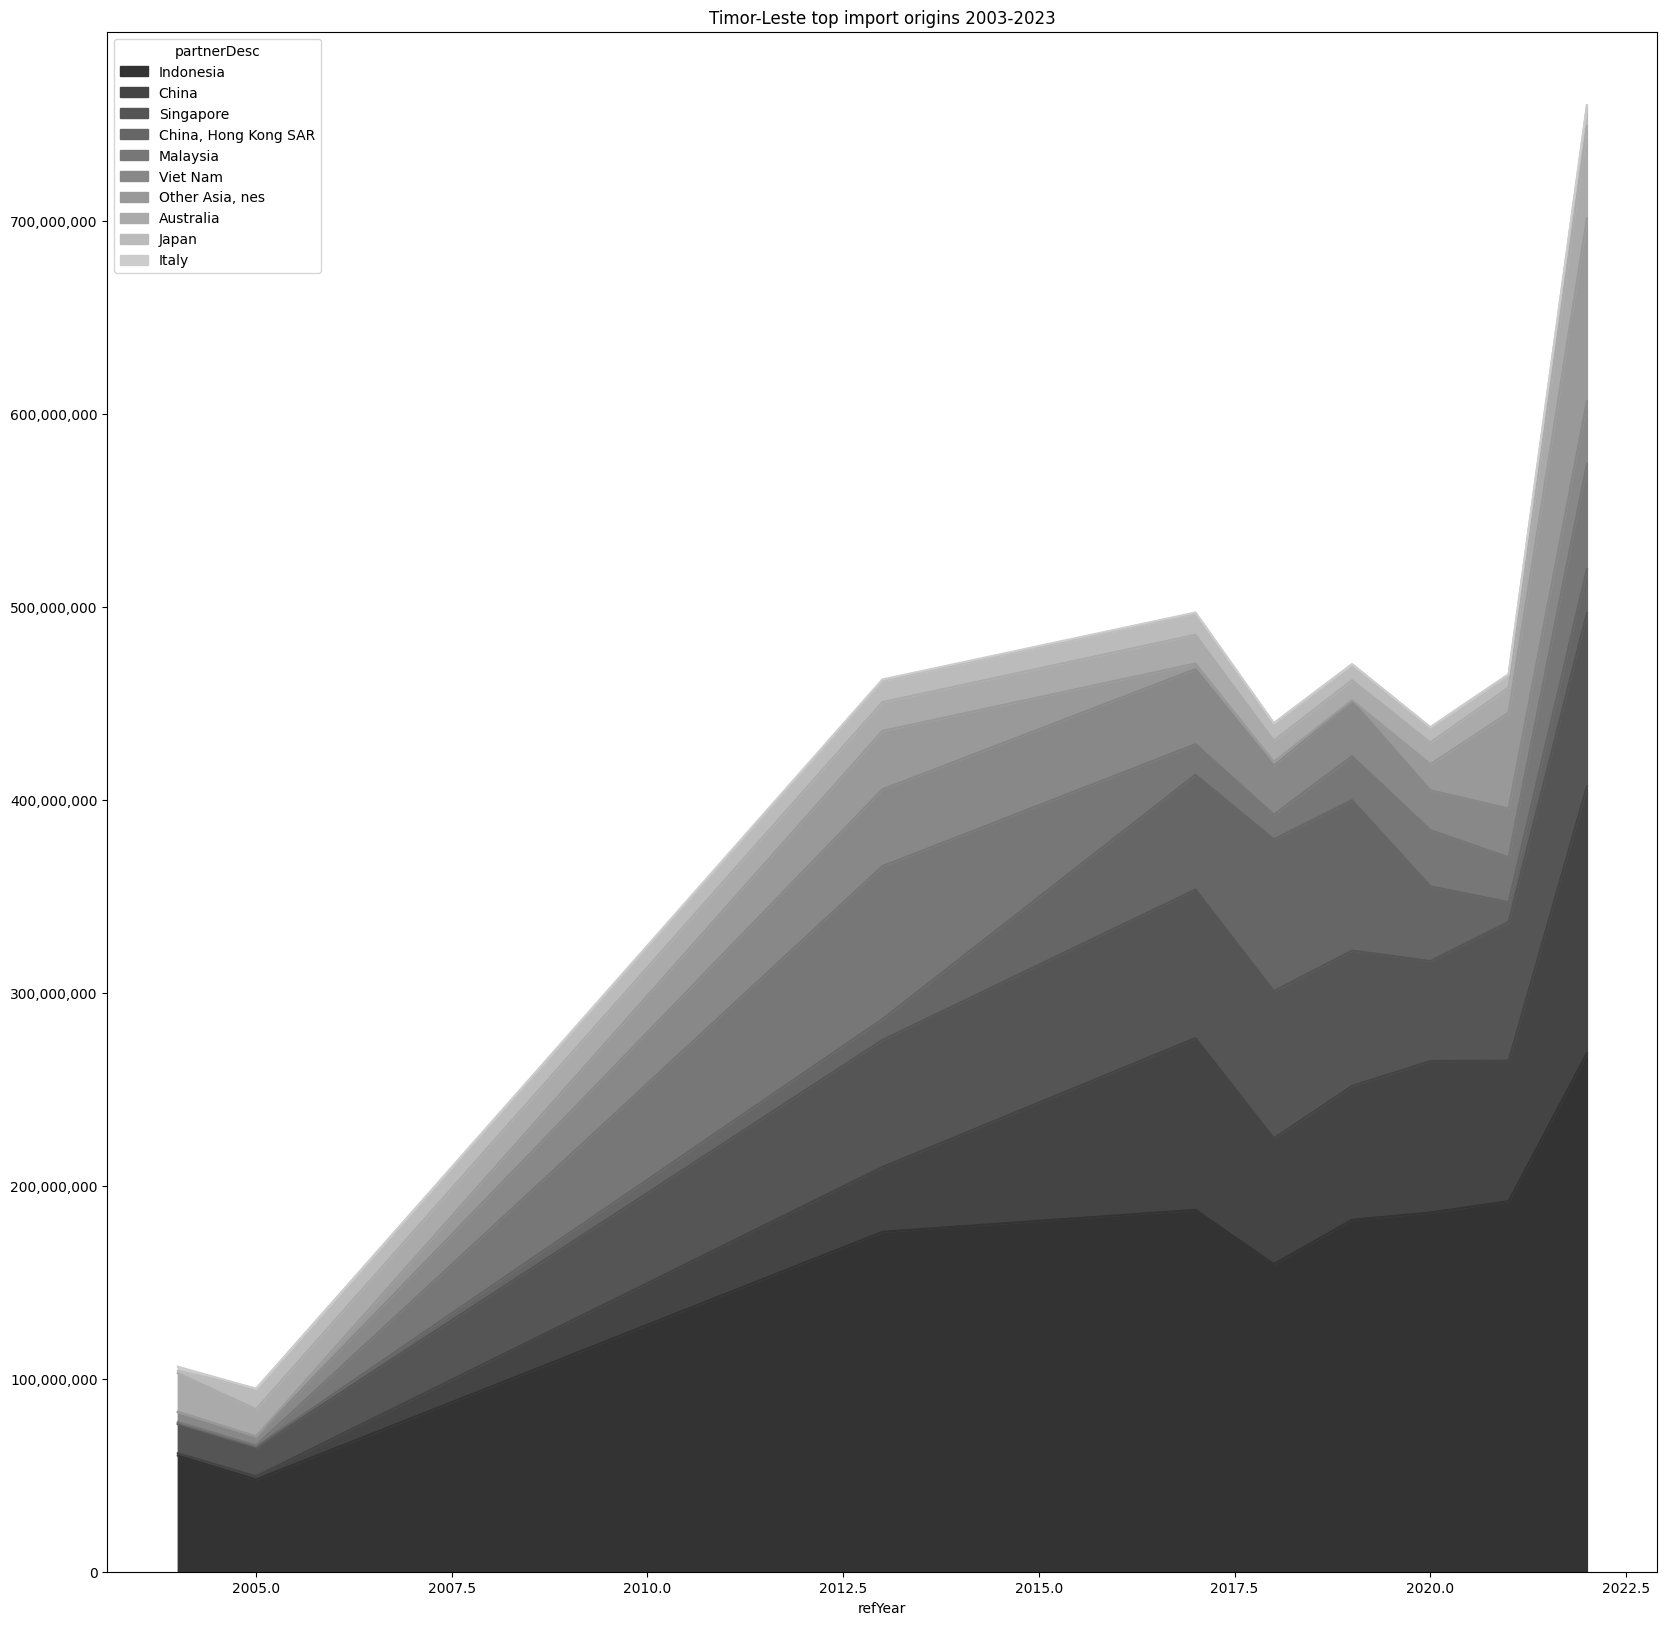

In [ ]:
import matplotlib.pyplot as plt

title=f"{country_of_interest_name} top import origins {start_year}-{end_year}"
plotfile = f"reports/{country_of_interest_name}_3.1.4_import_partners_{start_year}-{end_year}.png"

# colors = ['red','lightsalmon','green','lightgreen','darkviolet','violet','blue','dodgerblue','orange','yellow','brown','black','grey','pink','cyan','magenta',]
# colors = ['crimson', 'darkorange', 'gold', 'limegreen', 'mediumseagreen', 'teal', 'deepskyblue', 'royalblue', 'indigo', 'mediumvioletred', 'hotpink', 'saddlebrown', 'grey', 'black', 'darkslategrey', 'darkkhaki']
colors = [ '#333333','#444444', '#555555', '#666666', '#777777', '#888888', '#999999', '#AAAAAA', '#BBBBBB', '#CCCCCC', '#DDDDDD', '#EEEEEE']
fig2 = values_only.plot.area(figsize=(20,20),title=title, color=colors)

for i, line in enumerate(fig2.get_lines()):
    n = i % len(colors)
    # print(i, line, colors[n])
    line.set_color(colors[n])

formatter = ticker.StrMethodFormatter('{x:,.0f}')
fig2.yaxis.set_major_formatter(formatter)

plt.savefig(plotfile)
plt.show()

In [ ]:
plotfile

'reports/Timor-Leste_3.1.4_import_partners_2003-2023.png'

In [ ]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_import_partners]
list(show_only_columns)

[('partner_perc', 'Australia'),
 ('partner_perc', 'China'),
 ('partner_perc', 'China, Hong Kong SAR'),
 ('partner_perc', 'Indonesia'),
 ('partner_perc', 'Italy'),
 ('partner_perc', 'Japan'),
 ('partner_perc', 'Malaysia'),
 ('partner_perc', 'Other Asia, nes'),
 ('partner_perc', 'Singapore'),
 ('partner_perc', 'Viet Nam'),
 ('primaryValue', 'Australia'),
 ('primaryValue', 'China'),
 ('primaryValue', 'China, Hong Kong SAR'),
 ('primaryValue', 'Indonesia'),
 ('primaryValue', 'Italy'),
 ('primaryValue', 'Japan'),
 ('primaryValue', 'Malaysia'),
 ('primaryValue', 'Other Asia, nes'),
 ('primaryValue', 'Singapore'),
 ('primaryValue', 'Viet Nam')]

#### Export to Excel

Table with the top import origins for the period of interest

In [ ]:
top_partners_file = f'reports/{country_of_interest_name}_3.1.1_top_import_partners.xlsx'
top_partners_cols_file = f'reports/{country_of_interest_name}_3.1.2_top_import_partners_cols.xlsx'
import_top_partners_file = f'reports/{country_of_interest_name}_3.1.3_import_top_{show_only_top}_partners_{start_year}-{end_year}.xlsx'

imports[cols].sort_values(['refYear','flowCode','partner_rank']).to_excel(top_partners_file)
pivoted.to_excel(top_partners_cols_file)
pivoted[show_only_columns].reset_index().to_excel(import_top_partners_file)

print(f"Top import partners file: {top_partners_file}")
print(f"Top import partners cols file: {top_partners_cols_file}")
print(f"Import top partners file: {import_top_partners_file}")

Top import partners file: reports/Timor-Leste_3.1.1_top_import_partners.xlsx
Top import partners cols file: reports/Timor-Leste_3.1.2_top_import_partners_cols.xlsx
Import top partners file: reports/Timor-Leste_3.1.3_import_top_5_partners_2003-2023.xlsx


### 3.2 Imports: products

#### Main imported products

In [ ]:
import pandas as pd

# show 500 lines of dataframes
pd.set_option('display.max_rows', 500)

show_only_top=5
# years_of_interest = comtrade.year_range(2020, 2021)

print(country_of_interest_name, years_of_interest)


Timor-Leste 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


Get the products imported by country of interest

In [ ]:
# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = False  # set to false to use reported exports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'X'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'M'
    reporter_column = 'reporter'
    partner_column = 'partner'

In [ ]:
import comtradetools

clCode = 'HS'
cmdDetail = 'AG6'  # AG2 aggregate two digits, top level, AG4 detail 4 digits, ... World bank uses AG6
df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1,
                        partnerCode=partnerCode,
                        remove_world=False,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        retry_if_empty=False,
                        cache=True
                        )
df.info()

INFO:root:Calling getFinalData for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Calling getFinalData for period 2014
INFO:root:Calling getFinalData for period 2015
INFO:root:Calling getFinalData for period 2016
INFO:root:Calling getFinalData for period 2017
INFO:root:Calling getFinalData for period 2018
INFO:root:Calling getFinalData for period 2019
INFO:root:Calling getFinalData for period 2020
INFO:root:Calling getFinalData for period 2021
INFO:root:Calling getFinalData for period 2022
INFO:root:Calling getFinalData for period 2023
<class 'panda

In [ ]:
print("Years available in the data:", list(df.refYear.unique()))

Years available in the data: [2004, 2005, 2013, 2017, 2018, 2019, 2020, 2021, 2022]


In [ ]:
df.head()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,A,20040101,2004,52,2004,626,TLS,Timor-Leste,M,...,"12,199,891.00",True,NaN,False,"6,322,919.00",None,"6,322,919.00",6,True,False
1,C,A,20040101,2004,52,2004,626,TLS,Timor-Leste,M,...,"764,742.00",True,NaN,False,"441,891.00",None,"441,891.00",6,True,False
2,C,A,20040101,2004,52,2004,626,TLS,Timor-Leste,M,...,"294,602.00",True,NaN,False,"157,051.00",None,"157,051.00",6,True,False
3,C,A,20040101,2004,52,2004,626,TLS,Timor-Leste,M,...,"3,808,187.00",True,NaN,False,"1,179,444.00",None,"1,179,444.00",6,True,False
4,C,A,20040101,2004,52,2004,626,TLS,Timor-Leste,M,...,431.00,True,NaN,False,119.00,None,119.00,6,True,False


Agreggate by product, keep the top products imported each year

In [ ]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
imports = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode'],'primaryValue','product',drop_duplicates=True)
imports = imports[imports['product_rank']<=show_only_top]
imports.info()

cols=['refYear','flowCode','product_rank','cmdCode', 'cmdDesc','product_sum','product_upper_perc','classificationCode','aggrLevel','isLeaf', 'product_upper_sum']
formats =  comtradetools.make_format(cols)

top_import_products_codes = imports['cmdCode'].unique()

print(f"Top products imported by {country_of_interest_name} in {years_of_interest}:\n {top_import_products_codes}")
for cmdCode in top_import_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")
imports[cols].sort_values(['refYear','flowCode','product_rank']).head(10).style.format(formats)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 120216
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  45 non-null     object 
 1   freqCode                  45 non-null     object 
 2   refPeriodId               45 non-null     int64  
 3   refYear                   45 non-null     int64  
 4   refMonth                  45 non-null     int64  
 5   period                    45 non-null     object 
 6   reporterCode              45 non-null     int64  
 7   reporterISO               45 non-null     object 
 8   reporterDesc              45 non-null     object 
 9   flowCode                  45 non-null     object 
 10  flowDesc                  45 non-null     object 
 11  partnerCode               45 non-null     int64  
 12  partnerISO                45 non-null     object 
 13  partnerDesc               45 non-null     object 
 14  partner2

,refYear,flowCode,product_rank,cmdCode,cmdDesc,product_sum,product_upper_perc,classificationCode,aggrLevel,isLeaf,product_upper_sum
832,2004,M,1,271019,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations","$54,225,574",23.890%,H2,6,True,"$226,977,720"
831,2004,M,2,271011,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations","$17,077,616",7.524%,H2,6,True,"$226,977,720"
0,2004,M,3,100610,Cereals; rice in the husk (paddy or rough),"$12,645,838",5.571%,H2,6,True,"$226,977,720"
2853,2004,M,4,853390,Resistors; parts of the resistors of heading no. 8533,"$5,182,724",2.283%,H2,6,True,"$226,977,720"
2943,2004,M,5,870323,"Vehicles; spark-ignition internal combustion reciprocating piston engine, cylinder capacity exceeding 1500cc but not exceeding 3000cc","$3,974,520",1.751%,H2,6,True,"$226,977,720"
12921,2005,M,1,271019,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations","$59,166,396",29.114%,H2,6,True,"$203,226,314"
12247,2005,M,2,100610,Cereals; rice in the husk (paddy or rough),"$9,347,560",4.600%,H2,6,True,"$203,226,314"
12920,2005,M,3,271011,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations","$9,174,232",4.514%,H2,6,True,"$203,226,314"
14875,2005,M,4,870323,"Vehicles; spark-ignition internal combustion reciprocating piston engine, cylinder capacity exceeding 1500cc but not exceeding 3000cc","$4,481,746",2.205%,H2,6,True,"$203,226,314"
14247,2005,M,5,840790,"Engines; rotary internal combustion piston engines, for other than aircraft or marine propulsion","$3,634,496",1.788%,H2,6,True,"$203,226,314"


### Caveat

For Angola results match https://trendeconomy.com/data/h2/Angola/TOTAL for AG2 and AG4 but not https://www.statista.com/statistics/1143152/value-of-imports-into-angola-by-category/  and close but not same as https://globaledge.msu.edu/countries/angola/tradestats

The imports match World Bank Wits data mostly, but in some years 
there seems to be a mismatch of HS Codes, with different descriptions in Wits
and values that sometimes match AG4 and not AG6 (2015,total is AG4:2710 not AG6:271012 )
and in same cases match the first 5 digits (2015: 73042 "Casings tubing...", 2021 10011, Durum Wheat)

Use the following cell to compute totals for codes with first 5 digit in common to compare with other sources

In [ ]:
import pandas as pd

pd.set_option('display.max_colwidth', 200)
pd.options.display.float_format = '{:,.2f}'.format

code_prefix = '10011'
cols=['refYear','flowCode','product_rank','cmdCode','cmdDesc','primaryValue','product_perc', 'total']

# select rows and columns
selected_rows = df[(df['refYear']==2021) & (df['cmdCode'].str.startswith(code_prefix))][cols].sort_values(by=['primaryValue'],ascending=False).head(50)

# add total of primaryValue column
total = selected_rows['primaryValue'].sum()
selected_rows.loc['total'] = pd.Series({'primaryValue': total})

# display selected rows
selected_rows


,refYear,flowCode,cmdCode,cmdDesc,classificationCode,aggrLevel,primaryValue,product_rank,product_perc
344205,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,"12,817,108.86",6.00,0.01
349799,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,"8,908,269.03",6.00,0.01
342925,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,"3,908,546.35",6.00,0.00
354210,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,289.59,6.00,0.00
342542,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,3.90,6.00,0.00
Total,NaN,NaN,NaN,NaN,NaN,NaN,"25,634,217.73",NaN,NaN


In [ ]:
print("Years available in the data:", list(imports.refYear.unique()))

Years available in the data: [2004, 2005, 2013, 2017, 2018, 2019, 2020, 2021, 2022]


#### Export to Excel

In [ ]:
filename = f'reports/{country_of_interest_name}_3.2_imports_products_{clCode}-{cmdDetail}-{imports["refYear"].min()}-{imports["refYear"].max()}.xlsx'
print("Exporting to ",filename)
imports[cols].sort_values(['refYear','flowCode','product_rank']).to_excel(filename,index=False)

Exporting to  reports/Timor-Leste_3.2_imports_products_HS-AG6-2004-2022.xlsx


### 3.3 Import partners / product analysis

Which are the partners selling the top imports by country of interest

In [ ]:
# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = False  # set to false to use reported exports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'X'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'M'
    reporter_column = 'reporter'
    partner_column = 'partner'

In [ ]:
import warnings
warnings.filterwarnings('default')

clCode = 'HS'
cmdDetail = 'AG6'  # not all countries report at higher detail

df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1, # lots of data, better segment
                        partnerCode=partnerCode,
                        remove_world=False,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        retry_if_empty=False,
                        cache=True
                        )
df.info()

INFO:root:Calling getFinalData for period 2003
INFO:root:Using cached results for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Using cached results for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Using cached results for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Using cached results for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Using cached results for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Using cached results for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Using cached results for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Using cached results for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Using cached results for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Using cached results for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Usi

In [ ]:
cols2=['refYear','flowCode','reporterDesc','partnerDesc','primaryValue','cmdCode','cmdDesc']
df[cols2].sample(10)

,refYear,flowCode,reporterDesc,partnerDesc,primaryValue,cmdCode,cmdDesc
94864,2021,M,Timor-Leste,"China, Hong Kong SAR",595.70,850410,Discharge lamps or tubes; ballasts therefor
75957,2019,M,Timor-Leste,Indonesia,537.96,730519,"Iron or steel; line pipe of a kind used for oil or gas pipelines, (other than longitudinally welded), external diameter exceeds 406.4mm"
107986,2021,M,Timor-Leste,USA,"48,038.68",901920,"Therapeutic respiration apparatus; ozone, oxygen, aerosol therapy apparatus; artificial respiration or other therapeutic respiration apparatus"
86971,2020,M,Timor-Leste,Germany,1.02,190531,"Food preparations; sweet biscuits, whether or not containing cocoa"
127605,2022,M,Timor-Leste,Indonesia,"1,590.89",901060,Photographic laboratory apparatus and equipment (including cinematographic); projection screens
107772,2021,M,Timor-Leste,China,487.58,481013,"Paper and paperboard; coated with kaolin or other inorganic substances, for printing & writing, graphics, containing no, or not more than 10% by weight of total fibres obtained by mechanical or ch..."
120223,2022,M,Timor-Leste,World,60.81,843991,Machinery; parts of machinery for making pulp of fibrous cellulosic material
14417,2005,M,Timor-Leste,World,28.00,844130,"Machines; for making cartons, boxes, cases, tubes, drums or similar containers (other than by moulding), of paper pulp, paper or paperboard"
128999,2022,M,Timor-Leste,China,"1,710.71",847790,"Machinery; parts of the machines of heading no. 8477, n.e.c. in item no. 8477.90"
14467,2005,M,Timor-Leste,World,"5,419.00",845510,Metal-rolling mills; tube mills


In [ ]:
df.refYear.unique()

array([2004, 2005, 2013, 2017, 2018, 2019, 2020, 2021, 2022])

Aggregate by partner and keep the main ones

In [ ]:
import pandas as pd
import comtradetools
import warnings

# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5   # change to have more top partners

print(f"Top products imported by {country_of_interest_name} in {years_of_interest}:\n {top_import_products_codes}")
for cmdCode in top_import_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")

print(f"Top import partners ({len(top_import_partners)}): {top_import_partners}")
prefix='cmd_partner'
# remove world
if 0 in df[f'{partner_column}Code'].unique():
    warnings.warn("Removing world from data")
    df = df[df[f'{partner_column}Code']!=0]

products_and_partners = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode',f'{partner_column}Code'],'primaryValue',prefix,drop_duplicates=True)
cols=['refYear','flowCode','cmdDesc','cmdCode',f'{partner_column}Desc',f'{prefix}_rank',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats=comtradetools.make_format(cols)

products_and_partners=products_and_partners[(products_and_partners['cmdCode'].isin(top_import_products_codes)
                        & (products_and_partners[f'{prefix}_rank']<=show_only_top))]
print(f"Data available for years {products_and_partners.refYear.unique()}")


Top products imported by Timor-Leste in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023:
 ['100610' '271011' '271019' '853390' '870323' '840790' '630900' '870422'
 '100630' '252329' '871120' '100640' '020714' '271012' '842619']
   100610: Cereals; rice in the husk (paddy or rough)
   271011: 271011
   271019: Petroleum oils and oils from bituminous minerals, not containing biodiesel, not crude, not waste oils; preparations n.e.c, containing by weight 70% or more of petroleum oils or oils from bituminous minerals; not light oils and preparations
   853390: Resistors; parts of the resistors of heading no. 8533
   870323: Vehicles; with only spark-ignition internal combustion reciprocating piston engine, cylinder capacity over 1500 but not over 3000cc
   840790: Engines; rotary internal combustion piston engines, for other than aircraft or marine propulsion
   630900: Clothing; worn, and other worn articles
   870422: Vehicles; with

/var/folders/bc/41rz3hqn5335_y1tbvy1w2_w0000gp/T/ipykernel_10830/890561552.py:19: UserWarning: Removing world from data
  warnings.warn("Removing world from data")


Data available for years [2004 2005 2013 2017 2018 2019 2020 2021 2022]


### Partners for main import products

In [ ]:
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                        ascending=[True,True,False,True])\
                                            .head(30).style.format(formats) #.hide(axis='index')

,refYear,flowCode,cmdDesc,cmdCode,partnerDesc,cmd_partner_rank,cmd_partner_sum,cmd_partner_perc,cmd_partner_upper_sum
6943,2004,M,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations",271019,Indonesia,1,"$16,030,388",59.125%,"$27,112,787"
3796,2004,M,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations",271019,Australia,2,"$6,155,572",22.704%,"$27,112,787"
10532,2004,M,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations",271019,Singapore,3,"$4,926,814",18.172%,"$27,112,787"
9303,2004,M,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations",271019,Malaysia,4,$13,0.000%,"$27,112,787"
6942,2004,M,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations",271011,Indonesia,1,"$8,346,106",97.743%,"$8,538,808"
3795,2004,M,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations",271011,Australia,2,"$130,296",1.526%,"$8,538,808"
10531,2004,M,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations",271011,Singapore,3,"$58,163",0.681%,"$8,538,808"
9302,2004,M,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations",271011,Malaysia,4,"$2,955",0.035%,"$8,538,808"
6546,2004,M,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations",271011,Iceland,5,"$1,087",0.013%,"$8,538,808"
11493,2004,M,Cereals; rice in the husk (paddy or rough),100610,Viet Nam,1,"$3,997,162",63.217%,"$6,322,919"


In [ ]:
filename = f'reports/{country_of_interest_name}_3.3_imports_products_partners_{clCode}-{cmdDetail}-{products_and_partners["refYear"].min()}-{products_and_partners["refYear"].max()}.xlsx'
print("Exporting to ",filename)
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                        ascending=[True,True,False,True]).to_excel(filename, index=False)

Exporting to  reports/Timor-Leste_3.3_imports_products_partners_HS-AG6-2004-2022.xlsx


### 3.4 Main partners and main products imported by country of interest

Detail of the main products by import partner.

Allows to analyse the mix of products of the main suppliers from this country.



In [ ]:
top_import_partners

array(['Australia', 'Indonesia', 'Italy', 'Singapore', 'Viet Nam',
       'Japan', 'China', 'Malaysia', 'China, Hong Kong SAR',
       'Other Asia, nes'], dtype=object)

In [ ]:
import comtradetools

show_only_top = 5  # for suppliers with wide range of products e.g PT->AO increase

print(f"Top import partners ({len(top_import_partners)}): {top_import_partners}")
prefix='partner_cmd'
suppliers_and_products = comtradetools.total_rank_perc(df,['refYear','flowCode',f'{partner_column}Code','cmdCode'],'primaryValue',prefix,drop_duplicates=False)

cols=['refYear','flowCode',f'{partner_column}Desc',f'{prefix}_rank','cmdCode','cmdDesc',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats = comtradetools.make_format(cols)
suppliers_and_products=suppliers_and_products[(suppliers_and_products[f'{partner_column}Desc'].isin(top_import_partners)
                       & (suppliers_and_products[f'{prefix}_rank']<=show_only_top))]

print("First rows")
suppliers_and_products[suppliers_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).head(10).style.format(formats).hide(axis='index')

Top import partners (10): ['Australia' 'Indonesia' 'Italy' 'Singapore' 'Viet Nam' 'Japan' 'China'
 'Malaysia' 'China, Hong Kong SAR' 'Other Asia, nes']
First rows


refYear,flowCode,partnerDesc,partner_cmd_rank,cmdCode,cmdDesc,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2004,M,Indonesia,1,271019,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations","$16,030,388",26.629%,"$60,199,867"
2004,M,Indonesia,2,271011,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations","$8,346,106",13.864%,"$60,199,867"
2004,M,Indonesia,3,853390,Resistors; parts of the resistors of heading no. 8533,"$2,578,581",4.283%,"$60,199,867"
2004,M,Indonesia,4,870210,"Vehicles; public transport type (carries 10 or more passengers), compression-ignition internal combustion piston engine (diesel or semi-diesel)","$1,683,481",2.796%,"$60,199,867"
2004,M,Indonesia,5,100610,Cereals; rice in the husk (paddy or rough),"$1,544,275",2.565%,"$60,199,867"
2004,M,Australia,1,271019,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations","$6,155,572",30.700%,"$20,050,793"
2004,M,Australia,2,901832,"Medical, surgical instruments and appliances; tubular metal needles and needles for sutures","$519,674",2.592%,"$20,050,793"
2004,M,Australia,3,870899,"Vehicles; parts and accessories, n.e.s. in heading no. 8708","$427,055",2.130%,"$20,050,793"
2004,M,Australia,4,300310,"Medicaments; containing penicillins, streptomycins or their derivatives, for therapeutic or prophylactic uses, (not in measured doses, not packaged for retail sale)","$371,972",1.855%,"$20,050,793"
2004,M,Australia,5,960340,"Brushes; paint, distemper, varnish or similar brushes (not those of item no. 9603.30), paint pads and rollers","$322,814",1.610%,"$20,050,793"


Last rows

In [ ]:

suppliers_and_products[suppliers_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).tail(10).style.format(formats).hide(axis='index')

refYear,flowCode,partnerDesc,partner_cmd_rank,cmdCode,cmdDesc,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2022,M,Japan,1,870322,"Vehicles; with only spark-ignition internal combustion reciprocating piston engine, cylinder capacity over 1000 but not over 1500cc","$2,987,153",28.740%,"$10,393,533"
2022,M,Japan,2,870323,"Vehicles; with only spark-ignition internal combustion reciprocating piston engine, cylinder capacity over 1500 but not over 3000cc","$2,089,943",20.108%,"$10,393,533"
2022,M,Japan,3,870333,"Vehicles; with only compression-ignition internal combustion piston engine (diesel or semi-diesel), cylinder capacity over 2500cc","$1,558,193",14.992%,"$10,393,533"
2022,M,Japan,4,870321,"Vehicles; with only spark-ignition internal combustion reciprocating piston engine, cylinder capacity not over 1000cc","$625,664",6.020%,"$10,393,533"
2022,M,Japan,5,870332,"Vehicles; with only compression-ignition internal combustion piston engine (diesel or semi-diesel), cylinder capacity over 1500 but not over 2500cc","$250,286",2.408%,"$10,393,533"
2022,M,Italy,1,300490,"Medicaments; consisting of mixed or unmixed products n.e.c. in heading no. 3004, for therapeutic or prophylactic uses, packaged for retail sale","$111,611",23.389%,"$477,190"
2022,M,Italy,2,392330,"Plastics; carboys, bottles, flasks and similar articles, for the conveyance or packing of goods","$56,881",11.920%,"$477,190"
2022,M,Italy,3,150910,"Vegetable oils; olive oil and its fractions, virgin, whether or not refined, but not chemically modified","$34,004",7.126%,"$477,190"
2022,M,Italy,4,220421,"Wine; still, in containers holding 2 litres or less","$32,688",6.850%,"$477,190"
2022,M,Italy,5,901890,"Medical, surgical or dental instruments and appliances; n.e.c. in heading no. 9018","$30,682",6.430%,"$477,190"


#### Export to Excel

In [ ]:
filename = f'reports/{country_of_interest_name}_3.4_imports_partners_products_{clCode}-{cmdDetail}-{products_and_partners["refYear"].min()}-{products_and_partners["refYear"].max()}.xlsx'

suppliers_and_products[suppliers_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).to_excel(filename, index=False)

print("Exporting to ",filename)

Exporting to  reports/Timor-Leste_3.4_imports_partners_products_HS-AG6-2004-2022.xlsx


### 3.5 Get the alternative clients for country of interest suppliers

For each year, supplier, imported commodity, fetch all the 
exports of the commodity by the supplier to other countries, and
compute the ranking of country of interest among the clients
of partner for that commodity.

Country of interest: Angola, in 2022 Argentina was #1 supplier of Angola for commodity
code 100119 "Cereals; wheat and meslin, durum wheat, other than seed"; fetch all the clients of Argentina for 100119 and compute the ranking of Angola.

First step is to get the combos os partner and commodity.



In [ ]:
top_import_products_codes

array(['100610', '271011', '271019', '853390', '870323', '840790',
       '630900', '870422', '100630', '252329', '871120', '100640',
       '020714', '271012', '842619'], dtype=object)

In [ ]:
combos_of_interest = suppliers_and_products[(suppliers_and_products['cmdCode'].isin(top_import_products_codes)
                & (suppliers_and_products[f'{partner_column}Code'].isin(top_import_partners_codes)))][[f'{partner_column}Code','cmdCode']].drop_duplicates()
combos_of_interest = [tuple(x) for x in combos_of_interest.values]
len(combos_of_interest)

95

In [ ]:
# create lists of commodities codes and country codes to query comtrade
cmdCode_list = [cmdCode for (countryCode,cmdCode) in combos_of_interest]
cmdCode_list = list(set(cmdCode_list))
countryCode_list = [countryCode for (countryCode,cmdCode) in combos_of_interest]
countryCode_list = list(set(countryCode_list))
cmdCodeCSV = ','.join(cmdCode_list)
countryCodeCSV = ','.join(map(str,countryCode_list))

Get the all clients of suppliers for the products imported by country of interest

In [ ]:
print("Years of interest: ", years_of_interest)
print("countryCodeCSV: ", countryCodeCSV)
print("cmdCodeCSV: ", cmdCodeCSV)

df = comtradetools.getFinalData(APIKEY,
                                typeCode='C',  # commodities
                                freqCode='A',  # annual
                                flowCode='X',
                                reporterCode=countryCodeCSV,
                                partnerCode=None,
                                remove_world=True,
                                partner2Code=0,
                                period=years_of_interest,
                                period_size=1,
                                clCode=clCode,
                                cmdCode=cmdCodeCSV,  # Top level product types
                                motCode=0,  # all means of transport
                                customsCode='C00',
                                includeDesc=True,
                                retry_if_empty=False,
                                cache=True,

                                )

Years of interest:  2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
countryCodeCSV:  764,392,276,410,156,36,554,686,50,566,699,702,704,842,586,458,608,360,620,364,752,242,124
cmdCodeCSV:  760200,121299,841391,841330,271112,780199,220300,851762,853400,871680,999999,630900,720449,480100,090111,930599,151190,720918,271113,720429,030379,870490,731100,880220,090112,490199,270900,740811,090510,880330
INFO:root:Calling getFinalData for period 2003
INFO:root:Calling getFinalData for period 2004
INFO:root:Calling getFinalData for period 2005
INFO:root:Calling getFinalData for period 2006
INFO:root:Calling getFinalData for period 2007
INFO:root:Calling getFinalData for period 2008
INFO:root:Calling getFinalData for period 2009
INFO:root:Calling getFinalData for period 2010
INFO:root:Calling getFinalData for period 2011
INFO:root:Calling getFinalData for period 2012
INFO:root:Calling getFinalData for period 2013
INFO:root:Calling getFinalDa

Countries also buying top imports of country of interest from the same suppliers

In [ ]:
list(df.reporterDesc.unique()), list(df.partnerDesc.unique())


(['Belgium',
  'Brazil',
  'China',
  'Finland',
  'France',
  'Germany',
  'Italy',
  'Japan',
  'Portugal',
  'Netherlands',
  'Spain',
  'Togo',
  'USA'],
 ['Estonia',
  'Venezuela',
  'Algeria',
  'Brazil',
  'Colombia',
  'Dem. Rep. of the Congo',
  'Ecuador',
  'China, Hong Kong SAR',
  'Iraq',
  'Israel',
  'Rep. of Korea',
  'Mexico',
  'Other Asia, nes',
  'Rep. of Moldova',
  'Norway',
  'Philippines',
  'Romania',
  'Russian Federation',
  'Rwanda',
  'Senegal',
  'Singapore',
  'Slovakia',
  'Slovenia',
  'South Africa',
  'Thailand',
  'United Arab Emirates',
  'Ukraine',
  'Egypt',
  'Serbia and Montenegro (...2005)',
  'Canada',
  'Japan',
  'Czechia',
  'Türkiye',
  'Ireland',
  'Denmark',
  'Portugal',
  'Finland',
  'Sweden',
  'Switzerland',
  'Austria',
  'Greece',
  'United Kingdom',
  'USA',
  'Spain',
  'Italy',
  'Germany',
  'Luxembourg',
  'France',
  'Netherlands',
  'Ethiopia',
  'Eritrea',
  'Gambia',
  'Ghana',
  'Haiti',
  'Honduras',
  'Mali',
  'Niger',

### Ranking of country of interest in the costumers of main suppliers
Allows assessment of the importance of country of interest for the partners
that are selling its main imports.

It allows for restricting rank, avoiding irrelevant matchess

For each supplier show the top costumers of the products bought by country of interest. 

If country of interest is not in the top five constumers, show position anyway if it is a supplier in the given year 

In [ ]:
import pandas as pd
import comtradetools

#  set max rows to 500
pd.set_option('display.max_rows', 1500)


other_costumers = comtradetools.total_rank_perc(
                                        df,
                                        groupby=['refYear','flowCode','reporterCode','cmdCode','partnerCode'],
                                        col='primaryValue',
                                        prefix='cmd_partner',
                                        )

other_costumers = other_costumers[other_costumers[['reporterCode','cmdCode']].apply(tuple,axis=1).isin(combos_of_interest)]
cols=['reporterDesc','cmdCode','cmdDesc','refYear','partnerDesc','cmd_partner_rank','primaryValue','cmd_partner_perc','cmd_partner_upper_sum']
formats =  comtradetools.make_format(cols)

other_costumers[(other_costumers['partnerCode'] == country_of_interest)
                | (other_costumers['cmd_partner_rank']<=show_only_top)
                ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).head(20).style.format(formats).hide(axis="index")

reporterDesc,cmdCode,cmdDesc,refYear,partnerDesc,cmd_partner_rank,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
Australia,090111,Coffee; not roasted or decaffeinated,2003,New Zealand,1,"$622,885",53.672%,"$1,160,532"
Australia,090111,Coffee; not roasted or decaffeinated,2003,United Kingdom,2,"$110,886",9.555%,"$1,160,532"
Australia,090111,Coffee; not roasted or decaffeinated,2003,Singapore,3,"$89,990",7.754%,"$1,160,532"
Australia,090111,Coffee; not roasted or decaffeinated,2003,French Polynesia,4,"$82,268",7.089%,"$1,160,532"
Australia,090111,Coffee; not roasted or decaffeinated,2003,Rep. of Korea,5,"$79,755",6.872%,"$1,160,532"
Australia,090111,Coffee; not roasted or decaffeinated,2004,New Zealand,1,"$741,325",44.981%,"$1,648,094"
Australia,090111,Coffee; not roasted or decaffeinated,2004,United Kingdom,2,"$158,730",9.631%,"$1,648,094"
Australia,090111,Coffee; not roasted or decaffeinated,2004,USA,3,"$101,537",6.161%,"$1,648,094"
Australia,090111,Coffee; not roasted or decaffeinated,2004,New Caledonia,4,"$101,116",6.135%,"$1,648,094"
Australia,090111,Coffee; not roasted or decaffeinated,2004,Singapore,5,"$89,039",5.403%,"$1,648,094"


In [ ]:
ignore_if_rank_is_higher = 25

relevant_for_partner_exports=other_costumers[
    (other_costumers['partnerCode'] == country_of_interest) &
    (other_costumers['cmd_partner_rank'] < ignore_if_rank_is_higher)
][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank'])
relevant_for_partner_exports.head(10).style.format(formats).hide(axis='index')

reporterDesc,cmdCode,cmdDesc,refYear,partnerDesc,cmd_partner_rank,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
Australia,880220,Aeroplanes and other aircraft; of an unladen weight not exceeding 2000kg,2010,Timor-Leste,14,"$55,196",0.774%,"$7,134,908"
Australia,880220,Aeroplanes and other aircraft; of an unladen weight not exceeding 2000kg,2011,Timor-Leste,17,"$61,984",0.729%,"$8,506,394"
Australia,880220,Aeroplanes and other aircraft; of an unladen weight not exceeding 2000kg,2018,Timor-Leste,9,"$433,280",2.616%,"$16,561,224"
Australia,880220,Aeroplanes and other aircraft; of an unladen weight not exceeding 2000kg,2019,Timor-Leste,9,"$447,924",2.264%,"$19,787,102"
Australia,880220,Aeroplanes and other aircraft; of an unladen weight not exceeding 2000kg,2020,Timor-Leste,7,"$285,599",2.044%,"$13,970,885"
Australia,880220,"Aeroplanes and other aircraft, except unmanned; of an unladen weight not exceeding 2000kg",2022,Timor-Leste,9,"$52,023",0.798%,"$6,522,120"
Australia,880330,Aircraft and spacecraft; parts of aeroplanes or helicopters n.e.s. in heading no. 8803,2003,Timor-Leste,10,"$2,152,719",0.696%,"$309,401,293"
Australia,880330,Aircraft and spacecraft; parts of aeroplanes or helicopters n.e.c. in heading no. 8803,2009,Timor-Leste,15,"$2,468,598",0.498%,"$495,886,489"
Australia,880330,Aircraft and spacecraft; parts of aeroplanes or helicopters n.e.c. in heading no. 8803,2010,Timor-Leste,20,"$1,751,472",0.343%,"$511,159,145"
Australia,880330,Aircraft and spacecraft; parts of aeroplanes or helicopters n.e.c. in heading no. 8803,2012,Timor-Leste,23,"$2,413,698",0.277%,"$871,700,889"


#### Export to Excel


In [ ]:
filename = filename = f'reports/{country_of_interest_name}_3.5.1_import_partners_alternative.xlsx'

other_costumers[(other_costumers['partnerCode'] == country_of_interest)
                | (other_costumers['cmd_partner_rank']<=show_only_top)
                ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Timor-Leste_3.5.1_import_partners_alternative.xlsx


In [ ]:
filename = f'reports/{country_of_interest_name}_3.5.2_import_partners_alternative_relevant.xlsx'

relevant_for_partner_exports.to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Timor-Leste_3.5.2_import_partners_alternative_relevant.xlsx


In [ ]:
from datetime import datetime

current_datetime = datetime.now()
print(f"End run for {country_of_interest_name}:", current_datetime)

End run for Timor-Leste: 2024-06-19 18:41:18.170609


In [313]:
"Done"

'Done'